<< [第五章：计算机视觉的深度学习](Chapter5_Deep_learning_for_computer_vision.ipynb)|| [目录](index.md) || [第七章：高级深度学习最佳实践](Chapter7_Advanced_deep_learning_best_pratices.ipynb) >>

# 第六章：文本和序列的深度学习

> Here’s what you have learned in this chapter:

> - How to tokenize text.
- What word embeddings are, and how to use them.
- What recurrent networks are, and how to use them.
- How to stack RNN layers and use bidirectional RNNs to build more powerful sequence
processing models.
- How to use 1D convnets for sequence processing.
- How to combine 1D convnets and RNNs to process long sequences.

本章中你将会学习到以下内容：

- 如何标记化文本。
- 什么是词嵌入，以及如何使用它们。
- 如何堆叠RNN层，以及使用双向RNN网络来构建更强大的序列处理模型。
- 如何使用1D的卷积网络来进行序列处理。
- 如何组合使用1D卷积网络和RNN网络来处理长序列。

> These techniques are widely applicable to any dataset of sequence data, from text to
timeseries.

> For instance, you could use RNNs for:

> - Timeseries regression ("predicting the future").
- Timeseries classification.
- Anomaly detection in timeseries.
- Sequence labeling, e.g. identifying names or dates in sentences.
- ...

这些技巧被广泛应用在序列数据的数据集之上，从文本到时间序列。

例如，RNN网络可以用来进行：

- 时间序列回归（“预测未来”）。
- 时间序列分类。
- 检测时间序列中的异常。
- 序列标记，如在句子中定位名称或日期。
- ......

> Similarly, you could use 1D convnets for:

> - Machine translation (sequence-to-sequence convolutional models, like SliceNet).
- Document classification.
- Spelling correction.
- ...

类似的，你可以使用1D卷积网络来处理：

- 机器翻译（句子到句子的卷积网络模型，如SliceNet）。
- 文档分类。
- 拼写校正。
- ......

> Remember: if global order matters in your sequence data, then it is preferable to use
a recurrent network to process it. This is typically the case for timeseries, where the
recent past is likely to be more informative than the distant past. But if global ordering
isn’t fundamentally meaningful, then 1D convnets will turn out to work at least as well,
while being cheaper. This is often the case for text data, where a keyword found at the
beginning of a sentence is just as meaningful as a keyword found at the end.

记住：如果你的序列数据中全局顺序很重要，那么最好使用循环网络来处理。其典型的场景是时间序列，其中近期的数据显然要比很早之前的数据要重要很多。但是如果全局顺序并不是那么重要的话，那么1D卷积网络是一个很好的选择，至少能和循环网络表现一致，并且更便宜。其典型的场景是，一个关键字出现在句首或句尾都是同等重要的情况。

# 6.1 处理文本数据

> Text is one of the most widespread form of sequence data. It can be understood either as
a sequence of characters, or a sequence of words, albeit it is most common to work at the
level of words. The deep learning sequence processing models that we will introduce in
the next sections are able to leverage text to produce a basic form of natural language
understanding, sufficient for applications ranging from document classification,
sentiment analysis, author identification, or even question answering (in a constrained
context). Of course, keep in mind throughout this chapter that none of the deep learning
models you see truly "understands" text in a human sense, rather, these models are able
to map the statistical structure of written language, which is sufficient to solve many
simple textual tasks. Deep learning for natural language processing is simply pattern
recognition applied to words, sentences, and paragraphs, in much the same way that
computer vision is simply pattern recognition applied to pixels.

文本是一种最为广泛应用的序列数据。它既可以被理解为字符的序列，也可以被理解为单词的序列，尽管通常来说它都是在单词层面上来进行处理。我们在本小节介绍的深度学习序列处理模型，能够有效的处理文本并产生基本的自然语言理解能力，从而提供包括文档分类、情绪分析、作者识别甚至回答问题（在一个限定领域内）的各种高级应用。当然，你应该提醒自己的是，本章中你所了解的深度学习模型并不能像人类一样“真正的理解”语言，实际上这些模型只是语言的统计学结构，并且可以解决许多简单的文本任务。自然语言处理中的深度学习只是简单的单词、句子和段落的模式识别，正如上一章我们介绍的计算机视觉模型只是应用在像素点上的简单模式识别一样。

> Like all other neural networks, deep learning models do not take as input raw text:
they only work with numeric tensors. Vectorizing text is the process of transforming text
into numeric tensors. This can be done in multiple ways:

> - By segmenting text into words, and transforming each word into a vector.
- By segmenting text into characters, and transforming each character into a vector.
- By extracting "N-grams" of words or characters, and transforming each N-gram into a
vector. "N-grams" are overlapping groups of multiple consecutive words or characters.

就像其它的神经网络，深度学习模型无法使用原始文本作为输入：它们只能处理数值的张量。文本向量化就是将文本转换成数值张量的过程。下面这些方法都可以进行文本向量化过程：

- 将文本截断成单词，然后将每个单词向量化。
- 将文本阶段成字符，然后将每个字符向量化。
- 对单词或者字符提取“N-grams”，然后将N-gram向量化。“N-grams”是多个连续单词或者字符的重叠组合。

> Collectively, the different units into which you can break down text (words,
characters or N-grams) are called "tokens", and breaking down text into such tokens is
called "tokenization". All text vectorization processes consist in applying some
tokenization scheme, then associating numeric vectors with the generated tokens. These
vectors, packed into sequence tensors, are what gets fed into deep neural networks. There
are multiple ways to associate a vector to a token. In this section we will present two
major ones: one-hot encoding of tokens , and token embeddings (typically used
exclusively for words, and called "word embeddings" ). In the remainder of this section,
we will explain these techniques and show concretely how to use them to go from raw
text to a Numpy tensor that you can send to a Keras network.

概括来说，你能将文本打散成不同的单位（单词、字符或N-grams）都被称为“标记”，这一过程被称为“标记化”。所有的文本向量化过程都包括应用标记化的策略，然后将产生的标记转换为数值的向量。这些封装成序列化张量的向量，最终会被输入到深度神经网络中。事实上存在着多种方式将标记与向量联系起来。在本节中我们会展示其中主要的两种：one-hot标记编码和标记嵌入（一般仅用在单词上，被称为“词嵌入”）。在本小节后续内容中，我们会介绍这些技巧并展示如何从原始文本转换成一个Numpy张量，使其能够输入到Keras网络当中。

![text_to_tokens_to_vectors](imgs/f6.1.jpg)

图6-1 从文本到标记再到向量

> #### Note: Understanding N-grams and "bag-of-words".

> Word N-grams are groups of N (or fewer) consecutive words that you can
extract from a sentence. The same concept may also be applied to
characters instead of words.

> Here’s a simple example. Consider the sentence: "The cat sat on the
mat" . It may be decomposed as the following set of 2-grams:

注：理解N-grams和“单词包”。

单词N-grams是一组N个（或更少）能从句子中提取到的连续单词。同样的概念也可以应用在字符之上。

下面是一个简单的例子。考虑这个句子：“The cat sat on the mat”。它可以被分解为如下的2-grams的组合：

```python
{"The", "The cat", "cat", "cat sat", "sat", "sat on", "on", "on the", "the", "the mat", "mat"}
```

> It may also be decomposed as the following set of 3-grams:

它也可以被分解为如下的3-grams的组合：

```python
{"The", "The cat", "cat", "cat sat", "The cat sat",
"sat", "sat on", "on", "cat sat on", "on the", "the",
"sat on the", "the mat", "mat", "on the mat"}
```

> Such a set is called a "bag-of-3-grams" (resp. 2-grams). The term "bag"
here refers to the fact that we are dealing with a set of tokens rather than
a list or sequence: the tokens have no specific order. This family of
tokenization method is called "bag-of-words."

上面的这个集合被叫做“3-grams包”（2-grams也是一样）。这里的术语“包”代表一个事实，我们要处理的一个标记的组合而不是一个序列：这些标记没有特定的顺序。这样的标记化方法被称为“单词包”。

> Because bag-of-words are not an order-preserving tokenization
method (the tokens generated are understood as a set, not a sequence,
and the general structure of the sentences is lost), bag-of-words tend to
be used in shallow language processing models rather than in deep
learning models. Extracting N-grams is a form of feature engineering, and
deep learning does away with this kind of rigid and brittle feature
engineering, replacing it with hierarchical feature learning.
One-dimensional convnets and recurrent neural networks, introduced
later in this chapter, are capable of learning representations for groups of
words and characters without being explicitly told about the existence of
such groups, simply by looking at continuous word or character
sequences. For this reason, we will not be covering N-grams any further
in this book. But do keep in mind that they are a powerful, unavoidable
feature engineering tool when using lightweight shallow text processing
models such as logistic regression and random forests.

因为单词包方法不是一种保留顺序的标记化方法（产生的标记是以集合形式出现的，而不是序列，因此句子本身的顺序结构已经丢失），单词包一般用作浅语言处理模型而不是用在深度学习模型之上。提取N-grams是一种特征工程形式，深度学习已经不再需要采用这种死板而脆弱的特征工程，取而代之的是层次化的特征学习。本章后续介绍的一维的卷积网络和循环神经网络，能够从一组的单词和字符中学习到其表现形式，而不需要明确的告知网络存在这样的组合，可以直接从连续的单词或字符序列中进行学习。因此，本书将不再继续讨论N-grams，但读者需要记住的是，N-grams在轻量的浅学习模型中是非常有用的特征工程工具，例如逻辑回归和随机森林。

### 6.1.1 One-hot单词或字符编码

> One-hot encoding is the most common, most basic way to turn a token into a vector. You
already saw it in action in our initial IMDB and Reuters examples from chapter 3 (done
with words, in our case). It consists in associating a unique integer index to every word,
then turning this integer index i into a binary vector of size N, the size of the vocabulary,
that would be all-zeros except for the i-th entry, which would be 1.

One-hot编码是将标记变成向量的最常用最基本的方式。前面第三章的IMBD和路透社例子中（我们使用的是单词）我们已经应用过它。它包括将每个单词编码成一个唯一的整数序号，然后将这个整数序号i转换成一个N大小的二元向量，N是单词表的大小，也就是除了第i项为1外，向量的其他元素都为0。

> Of course, one-hot encoding can be done at the character level as well. To
unambiguously drive home what one-hot encoding is and how to implement it, here are
two toy examples of one-hot encoding: one for words, the other for characters.

当然，one-hot编码也可以用在字符层面。下面我们用两个玩具代码例子来详细说明one-hot编码概念以及如何实现，一个针对单词，另一个针对字符：

In [1]:
# 单词的one-hot编码

import numpy as np

# 下面是我们例子数据，两个句子组成的列表
# 本例中，数据是句子，事实上，数据也可以是整个文档
samples = ['The cat sat on the mat.', 'The dog ate my homework.']

# 首先建立数据中所有标记的集合
token_index = {}

for sample in samples:
    # 这里简单的使用split函数分解标记，真实数据中这样得到的标记还会存在标点符合和控制符号
    for word in sample.split():
        if word not in token_index:
            # 为每一个标记分配一个唯一的整数值
            token_index[word] = len(token_index) + 1

# 注意上面我们没有使用序号0，下面进行向量化
# 我们只考虑每个句子中前`max_length`个标记
max_length = 10
# 用来存储这些向量的Numpy张量
results = np.zeros((len(samples), max_length, max(token_index.values()) + 1))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = token_index.get(word)
        results[i, j, index] = 1.

results

array([[[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0

In [2]:
import string
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
characters = string.printable # 所有可打印的ASCII字符
token_index = dict(zip(range(1, len(characters) + 1), characters))
max_length = 50
results = np.zeros((len(samples), max_length, max(token_index.keys()) + 1))
for i, sample in enumerate(samples):
    for j, character in enumerate(sample):
        index = token_index.get(character)
        results[i, j, index] = 1.
        
results

array([[[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

> Note that Keras has built-in utilities for doing one-hot encoding text at the word level
or character level, starting from raw text data. This is what you should actually be using,
as it will take care of a number of important features, such as stripping special characters
from strings, or only taking into the top N most common words in your dataset (a
common restriction to avoid dealing with very large input vector spaces).

值得注意的是Keras有内建的工具来完成对文本单词或字符级别的one-hot编码。这是你应该在生产代码中应用的工具，因为它处理许多重要的特征，例如去除特殊符号，或者仅提取最多出现的N个单词（用来避免处理非常大的输入向量空间时最通用的方法）等。

In [3]:
from tensorflow.keras.preprocessing.text import Tokenizer

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

# 创建标记集合，仅取前1000个出现次数最多的单词
tokenizer = Tokenizer(num_words=1000)

# 从样本数据中构建标记集合
tokenizer.fit_on_texts(samples)

# 下面将文本转换成标记化的整数列表
sequences = tokenizer.texts_to_sequences(samples)

# 然后转换成one-hot编码，注意处理二元binary之外，工具还有其他的编码方式
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')

# 还可以从标记化结果反向获取单词的序号
word_index = tokenizer.word_index

print('Found %s unique tokens.' % len(word_index))

Found 9 unique tokens.


> A variant of one-hot encoding is the so-called "one-hot hashing trick", which can be
used when the number of unique tokens in your vocabulary is too large to handle
explicitly. Instead of explicitly assigning an index to each word and keeping a reference
of these indices in a dictionary, one may hash words into vectors of fixed size. This is
typically done with a very lightweight hashing function. The main advantage of this
method is that it does away with maintaining an explicit word index, which saves
memory and allows online encoding of the data (starting to generate token vectors right
away, before having seen all of the available data). The one drawback of this method is
that it is susceptible to "hash collisions": two different words may end up with the same
hash, and subsequently any machine learning model looking at these hashes won’t be
able to tell the difference between these words. The likelihood of hash collisions
decreases when the dimensionality of the hashing space is much larger than the total
number of unique tokens being hashed.

一个one-hot编码的变种被称为“one-hot哈希技巧”，这个技巧可以用在当数据集的唯一标记序号变得特别巨大难以处理的情况下。这个方法不是在一个字典中维护每一个单词的整数编号，而是在一个固定大小的哈希桶中维护单词的向量。通常会采用非常轻量的哈希函数来完成。这个方法的主要优点在于不再维护每个单词整数序号从而节省内存，并且还能够在线对数据进行编码（在看完所有数据之前就可以开始进行编码）。其缺点在于它潜在的出现“哈希碰撞”问题：两个不同的单词可能最终被编码成相同的哈希值，后续的机器学习模型将无法区分这两个不同的单词。哈希碰撞出现的概率会在哈希空间远大于唯一标记总数量空间的情况下大大降低。

In [4]:
samples = ['The cat sat on the mat.', 'The dog ate my homework.']

# 我们使用1000维度的哈希空间来存储单词标记序号
# 注意如果样本中如果有接近（甚至超过）1000个独立单词的话，哈希碰撞概率将会极大增加
dimensionality = 1000
max_length = 10
results = np.zeros((len(samples), max_length, dimensionality))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        
        # 每个单词取哈希值，并分布在哈希空间之中
        index = abs(hash(word)) % dimensionality
        results[i, j, index] = 1.

results

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

### 6.1.2 使用词嵌入

> Another popular and powerful way to associate a vector with a word is the use of dense
"word vectors", also called "word embeddings". While the vectors obtained through
one-hot encoding are binary, sparse (mostly made of zeros) and very high-dimensional
(same dimensionality as the number of words in the vocabulary), "word embeddings" are
low-dimensional floating point vectors (i.e. "dense" vectors, as opposed to sparse
vectors). Unlike word vectors obtained via one-hot encoding, word embeddings are
learned from data. It is common to see word embeddings that are 256-dimensional,
512-dimensional, or 1024-dimensional when dealing with very large vocabularies. On the
other hand, one-hot encoding words generally leads to vectors that are
20,000-dimensional or higher (capturing a vocabulary of 20,000 token in this case). So,
word embeddings pack more information into far fewer dimensions.

另一种流行又强大的将单词和一个向量联系起来的方法是使用密集的“词向量”，也被称为“词嵌入”。相比one-hot编码获得的二元的、稀疏的（大部分为0）和非常高维的（与单词表中的不同单词的数量一样维度值）的张量不同，“词嵌入”使用的是低维度的浮点数向量（也就是密集的向量，相对稀疏向量而言）。不像one-hot编码获得的词向量，词嵌入获得的向量是从数据中学习获得的。在处理非常大的词汇表时通常使用的词嵌入是256维、512维或1024维的。与此同时，使用one-hot编码将会获得20000个维度或以上（整个词汇表含有20000个不同的单词）。因此词嵌入在极小的空间维度中封装了更多的信息。

![one-hot and word embedding](imgs/f6.2.jpg)

图6-2 one-hot编码和词嵌入对比

> There are two ways to obtain word embeddings:

> - Learn word embeddings jointly with the main task you care about (e.g. document
classification or sentiment prediction). In this setup, you would start with random word
vectors, then learn your word vectors in the same way that you learn the weights of a
neural network.
- Load into your model word embeddings that were pre-computed using a different
machine learning task than the one you are trying to solve. These are called "pre-trained
word embeddings".

有两种获得词嵌入的方法：

- 联系你的主要目标来进行词嵌入学习（例如文档分类或情绪预测）。在这种方式中，你会从随机的词向量开始，然后类似训练神经网络权重值那样来学习词向量。
- 在你的模型中导入不同的机器学习任务预计算获得的词嵌入，而不是你当前的任务目标。这种方式被称为“预训练词嵌入”。

> Let’s take a look at both.

> #### LEARNING WORD EMBEDDINGS WITH THE EMBEDDING LAYER

>The simplest way to associate a dense vector to a word would be to pick the vector at
random. The problem with this approach is that the resulting embedding space would
have no structure: for instance, the words "accurate" and "exact" may end up with
completely different embeddings, even though they are interchangeable in most
sentences. It would be very difficult for a deep neural network to make sense of such a
noisy, unstructured embedding space.

下面我们介绍所有两种方式。

#### 使用嵌入层学习词嵌入

最简单将单词和密集向量联系起来的方法是随机选择一个向量。这个实现的问题在于获得的嵌入空间是没有结构的：例如，单词“accurate”和“exact”可能会得到完全不同的嵌入向量，虽然它们在大多数情况下都可以通用。使用这样充满噪声的非结构化嵌入空间是无法在深度神经网络中获得有意义的结果的。

> To get a bit more abstract: the geometric relationships between word vectors should
reflect the semantic relationships between these words. Word embeddings are meant to
map human language into a geometric space. For instance, in a reasonable embedding
space, we would expect synonyms to be embedded into similar word vectors, and in
general we would expect the geometric distance (e.g. L2 distance) between any two word
vectors to relate to the semantic distance of the associated words (words meaning very
different things would be embedded to points far away from each other, while related
words would be closer). Even beyond mere distance, we may want specific directions in
the embedding space to be meaningful. To make this clearer, let’s look at a concrete
example.

让我们更加抽象的来考虑：词向量的空间联系应该反映这些单词之间的语义关系。词嵌入的本质是将人类语言投射到一个空间之中。例如，在一个合理的嵌入空间，我们应该期望同义词会投射到近似的词向量之上，更确切的，我们会期望任何两个单词的在嵌入空间的距离（如L2距离）应该对应了它们在语义上的距离（表示完全不同含义的单词应该嵌入到空间中距离很远的两个点之上，而相关的单词应该嵌入到空间中邻近的点之上）。还有就是除了距离之外，我们还可以为嵌入空间中的方向赋予意义。让我们看一个实际例子来解释清楚。

> In figure 6.3, we embedded four words on a 2D plane, "cat", "dog", "wolf" and
"tiger". With the vector representations we chose here, some semantic relationships
between these words can be encoded as geometric transformations. For instance, a same
vector allows to go from "cat" to "tiger" and from "dog" to "wolf": this vector could be
interpreted as the "from pet to wild animal" vector. Similarly, another vector allows to go
from "dog" to "cat" and from "wolf" to "tiger", which could be interpreted as a "from
canine to feline" vector.

在图6-3中，我们将四个单词嵌入到了一个2D平面上，“cat”、“dog”、“wolf”和“tiger”。图上我们的词向量空间表现形式可以体现出这些单词之间的语义关系。例如可以想象图中有一个相同的向量从“cat”指向“tiger”以及从“dog”指向“wolf”：这个向量可以被解读为“从宠物到野生动物”的向量。相似的，还可以找到一个相同的向量从“dog”指向“cat”以及从“wolf”指向“tiger”，它可以解释为一个“从犬科动物到猫科动物”的向量。

![word embedding space](imgs/f6.3.jpg)

图6-3 词嵌入空间的一个简单例子

> In real-world word embedding spaces, common examples of meaningful geometric
transformations are "gender vectors" and "plural vector". For instance, by adding a
"female vector" to the vector "king", one obtain the vector "queen". By adding a "plural
vector", one obtain "kings". Word embedding spaces typically feature thousands of such
interpretable and potentially useful vectors.

在真实的词嵌入空间中，常用的有意义的空间转换向量包括“性别向量”和“复数向量”。例如，对向量“king”加上一个“女性向量转换”后，可以得到向量“queen”。对其机上一个“复数向量转换”后，可以得到向量“kings”。词嵌入空间能表达出数千个这样可解释的有用的向量。

> Is there some "ideal" word embedding space that would perfectly map human
language and could be used for any natural language processing task? Possibly, but in
any case, we have yet to compute anything of the sort. Also, there isn’t such a thing as
"human language", there are many different languages and they are not isomorphic, as a
language is the reflection of a specific culture and a specific context. But more
pragmatically, what makes a good word embedding space depends heavily on your task:
the perfect word embedding space for an English-language movie review sentiment
analysis model may look very different from the perfect embedding space for an
English-language legal document classification model, because the importance of certain
semantic relationships varies from task to task.

那么是否存在着一个“理想的”词嵌入空间能够完美的映射人类语言并在所有的自然语言处理任务上使用呢？也许吧，但是在任何情况下，我们也都需要计算那种类型的所有数据。首先并不存在的“人类语言”这种说法，世界上存在着很多种不同的语言而且它们都不是同构的，因为一门语言实际上是特定文化和环境造就的。而且更加重要的是，一个好的词嵌入空间严重依赖你的任务目标：对于英语影评的情绪分析模型来说的好的词嵌入空间，可能与英语法律文件分类模型的好的词嵌入空间有区别，因为在不同的人物当中，一些语义联系的重要性是有区别的。

> It is thus reasonable to learn a new embedding space with every new task.
Thankfully, backpropagation makes this really easy, and Keras makes it even easier. It’s
just about learning the weights a layer: the Embedding layer.

因此为每个新任务来训练一个词嵌入空间是合理的途径。幸运的是反向传播使得这个方式非常轻松，而Keras能更进一步简化。因为它实际上就是训练一个层次上的权重而已：嵌入层。

In [5]:
from tensorflow.keras.layers import Embedding

# 嵌入层至少需要两个参数，词汇表个数（最大单词序号+1）和维度
# 这里使用了单词个数1000，维度是64
embedding_layer = Embedding(1000, 64)

> The Embedding layer is best understood as a dictionary mapping integer indices
(which stand for specific words) to dense vectors. It takes as input integers, it looks up
these integers into an internal dictionary, and it returns the associated vectors. It’s
effectively a dictionary lookup.

理解嵌入层的最佳方式是它是一个将整数序号（实际上代表特定的单词）映射成密集向量的字典。它接收输入的整数，然后在内部的字典中查找这些整数，最后返回相对应的向量。这个字典查找的效率非常高。

```
单词序号 -> 嵌入层 -> 相对应的向量
```

> The Embedding layer takes as input a 2D tensor of integers, of shape (samples,
sequence_length) , where each entry is a sequence of integers. It can embed sequences
of variable lengths, so for instance we could feed into our embedding layer above batches
that could have shapes (32, 10) (batch of 32 sequences of length 10) or (64, 15)
(batch of 64 sequences of length 15). All sequences in a batch must have the same length,
though (since we need to pack them into a single tensor), so sequences that are shorter
than others should be padded with zeros, and sequences that are longer should be
truncated.

嵌入层接收一个2D的整数张量作为输入，形状是(样本数, 序列长度)，其中每个样本都是一个整数的序列。它可以接收可变长度的序列进行嵌入，因此我们可以往嵌入层输入形状为(32, 10)（批次32个序列，每个序列长度为10）或者(64, 15)（批次64个序列，每个序列长度为15）的张量。一个批次中所有的序列长度必须相同（因为我们需要将它们封装到一个张量当中），因此那些长度不足的序列需要在后面的维度上补0，那些超过长度的序列将会被截断。

> This layer returns a 3D floating point tensor, of shape (samples,
sequence_length, embedding_dimensionality) . Such a 3D tensor can then be
processed by a RNN layer or a 1D convolution layer (both will be introduced in the next
sections).

嵌入层返回一个3D浮点数张量，形状为(样本数, 序列长度, 嵌入维度)。这样输出的3D张量后续可以被一个RNN层或者一个1D卷积层接收（将会在下一小节介绍）。

> When you instantiate an Embedding layer, its weights (its internal dictionary of token
vectors) are initially random, just like with any other layer. During training, these word
vectors will be gradually adjusted via backpropagation, structuring the space into
something that the downstream model can exploit. Once fully trained, your embedding
space will show a lot of structure—a kind of structure specialized for the specific
problem you were training your model for.

当你初始化一个嵌入层时，它的权重值（其内部字典中的标记向量）是随机产生的，就像其他的层一样。在训练过程中，这些词向量也会通过反向传播进行更新，慢慢形成一个下游模型能够合理利用的结构化空间。一旦训练完成，嵌入空间会展示很多结构化信息，这些结构化信息能够很好的体现你的训练模型用来解决的实际问题。

> Let’s apply this idea to the IMDB movie review sentiment prediction task that you are
already familiar with. With, let’s quickly prepare the data. We will restrict the movie
reviews to the top 10,000 most common words (like we did the first time we worked with
this dataset), and cut the reviews after only 20 words. Our network will simply learn
8-dimensional embeddings for each of the 10,000 words, turn the input integer sequences
(2D integer tensor) into embedded sequences (3D float tensor), flatten the tensor to 2D,
and train a single Dense layer on top for classification.

让我们将这个方法应用到IMDB影评情绪预测任务当中，这个数据集在前面我们已经使用过。让我们很快地准备好数据。我们会将影评限制在最高频率的10000个单词上（正如之前我们使用这个数据集时那样），然后将每个影评截留前20个单词。我们的网络将在10000个不同的单词上简单的学习一个8维的嵌入空间，从而将输入的整数序列（2D整数张量）转换成嵌入序列（3D浮点数张量），然后将该张量铺平成2D，最后使用一个全连接层来进行分类。

In [6]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras import preprocessing

# 词汇表单词数，也就是最大的特征数
max_features = 10000

# 每条影评采用的单词个数，前20个单词
maxlen = 20

# 将数据集导入成序列列表
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# 下面将整数列表转换成一个2D张量，形状为(样本数, 序列长度)
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

model = Sequential()

# 这里我们指定嵌入层的输入序列长度，方便后续将3D张量铺平成2D张量
model.add(Embedding(10000, 8, input_length=maxlen))

# 然后加入Flatten层，嵌入层的输出形状为(样本数, 序列长度, 8)
# 经过flatten之后形状变为(样本数, 序列长度 × 8)
model.add(Flatten())

# 最后加上一个全连接层分类器
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten (Flatten)            (None, 160)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 2s 93us/sample - loss: 0.6604 - acc: 0.6373 - val_loss: 0.6021 - val_acc: 0.7036
Epoch 2/10
20000/20000 [==============================] - 1s 47us/sample - loss: 0.5290 - acc: 0.7571 - val_loss: 0.5198 - val_acc: 0.7382
Epoch 3/10
20000/20000 [==============================]

> We get to a validation accuracy of ~76%, which is pretty good considering that we
are only look at the first 20 words in every review. But note that merely flattening the
embedded sequences and training a single Dense layer on top leads to a model that treats
each word in the input sequence separately, without considering inter-word relationships
and structure sentence (e.g. it would likely treat both "this movie is shit" and "this movie
is the shit" as being negative "reviews"). It would be much better to add recurrent layers
or 1D convolutional layers on top of the embedded sequences to learn features that take
into account each sequence as a whole. That’s what we will focus on in the next few
sections.

我们获得了约76%的验证准确率，考虑到我们仅仅使用了每条影评的头20个单词来说，这个结果还是很不错的。这里需要注意的是，直接将嵌入的序列铺平然后在其上放置一个全连接层的结构，会导致我们的模型会将输入中的每个单词独立处理，而不会考虑单词之间的关联和句子的结构（例如，模型可能会将“this movie is shit”表示“这部电影太烂了”，和“this movie is the shit”表示“这部电影太牛逼了”都预测为负面评论）。如果在嵌入序列之上再放置一个循环层或者1D卷积层的话，就能将整个句子或短语一起进行评价。这将会是后续几个小节的重点。

> #### USING PRE-TRAINED WORD EMBEDDINGS

> Sometimes, you have so little training data available that could never use your data alone
to learn an appropriate task-specific embedding of your vocabulary. What to do then?

> Instead of learning word embeddings jointly with the problem you want to solve, you
could be loading embedding vectors from a pre-computed embedding space known to be
highly structured and to exhibit useful properties—that captures generic aspects of
language structure. The rationale behind using pre-trained word embeddings in natural
language processing is very much the same as for using pre-trained convnets in image
classification: we don’t have enough data available to learn truly powerful features on
our own, but we expect the features that we need to be fairly generic, i.e. common visual
features or semantic features. In this case it makes sense to reuse features learned on a
different problem.

#### 使用预训练词嵌入

有的时候，你只有很少量的训练数据，因此无法仅使用手头的数据来学习到与你的任务相关的词嵌入表示。如何解决？

这时你应该放弃使用学习与任务目标相关的词嵌入的方案，而使用从一个预计算的嵌入空间载入嵌入向量的办法，该预计算的嵌入空间已经是高度结构化并且能展示出有用的特性，即已经具备语言的通用结构了。在自然语言处理中使用预训练词嵌入背后的原理实际上与在图像分类中使用预训练卷积网络的原理是一致的：我们自己没有足够的数据类学习到真正强大的特征，但是我们可以预期这些特征具有足够的通用性，也就是通用的视觉特征或者语义特征。这种情况下我们复用另一个任务中学习到的特征是可行的。

> Such word embeddings are generally computed using word occurrence statistics
(observations about what words co-occur in sentences or documents), using a variety of
techniques, some involving neural networks, others not. The idea of a dense,
low-dimensional embedding space for words, computed in an unsupervised way, was
initially explored by Bengio et al. in the early 2000s, but it only started really taking off
in research and industry applications after the release of one of the most famous and
successful word embedding scheme: the Word2Vec algorithm, developed by Mikolov at
Google in 2013. Word2Vec dimensions capture specific semantic properties, e.g. gender.

这种词嵌入通常采用单词出现频率统计来计算获得（也就是单词在句子和文档中联合出现的频率），应用技巧有很多种，有的使用了神经网络，有的没有。这种使用单词密集低维度的嵌入空间，采用一个无监督方式来计算权重的想法最早是在2000年左右由Bengio首创的。但是直到2013年当时在谷歌工作的Mikolov发明了Word2Vec之后才真正流行起来，这是最著名和成功的词嵌入方法之一。Word2Vec的维度能够捕捉特定的语义属性，比方说性别。

> There are various pre-computed databases of word embeddings that can download
and start using in a Keras Embedding layer. Word2Vec is one of them. Another popular
one is called "GloVe", developed by Stanford researchers in 2014. It stands for "Global
Vectors for Word Representation", and it is an embedding technique based on factorizing
a matrix of word co-occurrence statistics. Its developers have made available
pre-computed embeddings for millions of English tokens, obtained from Wikipedia data
or from Common Crawl data.

目前有很多不同的预计算的词嵌入数据集可供下载，并能在Keras的嵌入层中应用。Word2Vec是其中之一。另一个流行的方法叫做“GloVe”，2014年由斯坦福的研究人员发明。它的名称含义是“单词表示通用向量”，基于一种单词联合出现统计的矩阵分解的技巧。其发明者已经生成了包含上百万英语标记的预计算嵌入数据，原始数据来源自维基或者其他常见的爬虫数据。

> Let’s take a look at how you can get started using GloVe embeddings in a Keras
model. The same method will of course be valid for Word2Vec embeddings or any other
word embedding database that you can download. We will also use this example to
refresh the text tokenization techniques we introduced a few paragraphs ago: we will start
from raw text, and work our way up.

让我们看一下在Keras模型中如何开始使用GloVe嵌入。当然这个方法对于Word2Vec嵌入和其他网上可下载词嵌入数据集都是通用的。我们还能用这个例子来复习一下前几个小节介绍的知识：我们使用原始文本开始，然后逐步搭建模型。

### 6.1.3 结合起来：从原始文本到词嵌入

> We will be using a model similar to the one we just went over—embedding sentences in
sequences of vectors, flattening them and training a Dense layer on top. But we will do it
using pre-trained word embeddings, and instead of using the pre-tokenized IMDB data
packaged in Keras, we will start from scratch, by downloading the original text data.

我们会使用和前面相似的模型，将一个句子嵌入成一个向量序列，然后将其铺平，最后用一个全连接层来训练。但下面我们会使用预训练的词嵌入，而不是使用Keras中封装号的预标记化的IMDB数据，我们会从零开始，首先是下载原始文本数据。

#### 下载IMDB原始文本数据

> First, head to ai.stanford.edu/~amaas/data/sentiment/ and download the raw
IMDB dataset (if the URL isn’t working anymore, just Google "IMDB dataset").
Uncompress it.

首先，前往[这里](https://ai.stanford.edu/~amaas/data/sentiment/)下载原始IMDB数据集（如果URL失效了，请谷歌“IMDB dataset”）。然后解压缩。

> Now let’s collect the individual training reviews into a list of strings, one string per
review, and let’s also collect the review labels (positive / negative) into a labels list:

下面我们将每个训练影评封装成字符串的列表，每个评论一个字符串，然后我们也将评论的标签（正面/负面）也封装成一个标签列表：

In [8]:
import os

imdb_dir = os.path.join(os.environ["HOME"], 'data', 'aclImdb')
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            with open(os.path.join(dir_name, fname)) as f:
                texts.append(f.read())
            labels.append(0 if label_type == 'neg' else 1)

#### 标记化数据

> Let’s vectorize the texts we collected, and prepare a training and validation split. We will
merely be using the concepts we introduced earlier in this section.

> Because pre-trained word embeddings are meant to be particularly useful on
problems where little training data is available (otherwise, task-specific embeddings are
likely to outperform them), we will add the following twist: we restrict the training data
to its first 200 samples. So we will be learning to classify movie reviews after looking at
just 200 examples...

下面让我们对收集到的文本进行向量化，然后准备一个训练集和一个验证集。我们只需要使用到本章前面介绍过的知识。

因为预训练词嵌入一般应用在较少训练数据的情况下（否则的话，依据任务特性需要训练的词嵌入方法一般都会表现更好），因此我们对数据集进行进一步裁剪：我们只采用训练数据的前200个样本。最终我们将会获得一个仅学习了200个影评样本数据的情绪预测模型......

In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100 # 每个影评只是用前100个单词
training_samples = 200 # 我们只是用前200个样本
validation_samples = 10000 # 我们将使用10000个样本作为验证集
max_words = 10000 # 我们将词汇表限制在10000个单词

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)
labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# 下面分成训练集和验证集，不过首先打散真个数据集，因为之前加入列表的时候是有顺序的，先负面再正面
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 88582 unique tokens.
Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


#### 下载GloVe预训练词嵌入

> Head to nlp.stanford.edu/projects/glove/ (where you can learn more about the
GloVe algorithm), and download the pre-computed embeddings from 2014 English
Wikipedia. It’s a 822MB zip file named glove.6B.zip , containing 100-dimensional
embedding vectors for 400,000 words (or non-word tokens). Un-zip it.

你可以到[这里](https://nlp.stanford.edu/projects/glove/)去下载GloVe词嵌入向量集，也可以在这个站点上去深入了解GloVe的算法。这是一个从2014年英文百科维基上预先计算得到的嵌入向量集，是一个822MB大小名为glove.6B.zip的文件，里面包括着40万个单词（也有非单词标记）在100个维度上的嵌入向量。然后解压缩。

#### 预处理嵌入向量集

> Let’s parse the un-zipped file (it’s a txt file) to build an index mapping words (as
strings) to their vector representation (as number vectors).

然后我们来解析解压后的文本文件，创建一个单词（字符串格式）和对应的向量数值（一个数值向量）的字典。

In [10]:
glove_dir = os.path.join(os.environ['HOME'], 'data', 'glove')

embeddings_index = {}
with open(os.path.join(glove_dir, 'glove.6B.100d.txt')) as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


> Now let’s build an embedding matrix that we will be able to load into an Embedding
layer. It must be a matrix of shape (max_words, embedding_dim) , where each entry i
contains the embedding_dim -dimensional vector for the word of index i in our reference
word index (built during tokenization). Note that the index 0 is not supposed to stand for
any word or token—it’s a placeholder.

接下来需要构建一个嵌入矩阵，用于载入我们的嵌入层。这个矩阵的形状为(词汇表单词数, 嵌入维度)，里面每一行i都有这嵌入维度数，也就是之前我们标记化的文本中每个单词对应的维度向量。这里需要注意的是序号0不代表任何单词或标记，它只是一个占位符。

In [11]:
embedding_dim = 100
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # 在预训练词嵌入向量集中找不到的单词，其嵌入向量各维度均为0
            embedding_matrix[i] = embedding_vector

#### 定义我们的模型

> We will be using the same model architecture as before:

我们还是使用与上一节相同的模型结构：

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


#### 将GloVe预训练词嵌入载入到模型中

> The Embedding layer has a single weight matrix: a 2D float matrix where each entry i is
the word vector meant to be associated with index i . Simple enough. Let’s just load the
GloVe matrix we prepared into our Embedding layer, the first layer in our model:

模型中的嵌入层只有一个权重矩阵：它是一个2D的浮点数矩阵，其中每一行i对应的是词汇表第i个单词的嵌入向量。很容易理解。我们只需要将这个矩阵放入嵌入层，也就是模型中的第一层即可：

In [13]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

> Additionally, we freeze the embedding layer (we set its trainable attribute to False
), following the same rationale as what you are already familiar with in the context of
pre-trained convnet features: when parts of a model are pre-trained (like our Embedding
layer), and parts are randomly initialized (like our classifier), the pre-trained parts should
not be updated during training to avoid forgetting what they already know. The large
gradient updated triggered by the randomly initialized layers would be very disruptive to
the already learned features.

并且我们将该嵌入层冻结（上述代码将trainable属性设置为False）。这基于上一章中我们学习到的使用预训练卷积网络特征相同的原则：当模型部分层次是预训练好的（就像我们的嵌入层），而其他层次是随机初始化的（就像我们后面的两个全连接层分类器），这种情况下预训练层次不应用在训练过程中更新权重值以免丢失已经学习到的特征。训练时由于随机初始化层次产生的巨大梯度更新过程会极大破坏已经学习到的特征。

#### 训练和验证

> Let’s compile our model and train it:

最后我们来编译模型并且训练它：

In [14]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('models/pre_trained_glove_model.h5')

Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 1s 5ms/sample - loss: 1.7069 - acc: 0.5250 - val_loss: 0.7003 - val_acc: 0.4981
Epoch 2/10
200/200 [==============================] - 0s 2ms/sample - loss: 0.8818 - acc: 0.6950 - val_loss: 0.8392 - val_acc: 0.5077
Epoch 3/10
200/200 [==============================] - 0s 2ms/sample - loss: 0.3762 - acc: 0.8150 - val_loss: 0.8719 - val_acc: 0.5040
Epoch 4/10
200/200 [==============================] - 0s 2ms/sample - loss: 0.4000 - acc: 0.8100 - val_loss: 0.7234 - val_acc: 0.5400
Epoch 5/10
200/200 [==============================] - 0s 2ms/sample - loss: 0.2118 - acc: 0.9300 - val_loss: 1.6746 - val_acc: 0.4961
Epoch 6/10
200/200 [==============================] - 0s 2ms/sample - loss: 0.2869 - acc: 0.8300 - val_loss: 0.7424 - val_acc: 0.5447
Epoch 7/10
200/200 [==============================] - 0s 2ms/sample - loss: 0.0504 - acc: 1.0000 - val_loss: 1.0265 - val_acc: 0.5115
Epoch 8/10
200

> Let’s plot its performance over time:

绘制性能曲线：


Bad key "text.kerning_factor" on line 4 in
/home/wangy/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


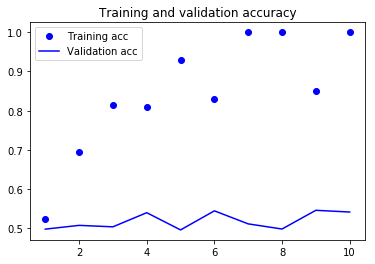

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

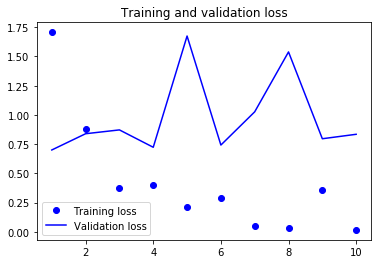

In [16]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

> The model quickly starts overfitting, unsurprisingly given the small number of
training samples. Validation accuracy has high variance for the same reason, but seems to
reach high 50s.

这个模型很快就开始过拟合了，当然在如此少的训练样本的情况下并不让人意外。同样的原因也造成了验证准确率有着很高的方差，不过准确率大约达到了50以上。

> Note that your mileage may vary: since we have so few training samples,
performance is heavily dependent on which exact 200 samples we picked, and we picked
them at random. If it worked really poorly for you, try picking a different random set of
200 samples, just for the sake of the exercise (in real life you don’t get to pick your
training data).

请注意这个例子中，你运行的结果很可能会不一样：因为我们使用了很少的训练样本，模型的性能严重依赖于你随机选择的200个训练样本。如果你运行的结果与上面相比差了很多，你可以尝试重新随机选择200个样本，当然只是为了练习（真实情况下你不应该挑选你的训练数据）。

> We can also try to train the same model without loading the pre-trained word
embeddings and without freezing the embedding layer. In that case, we would be
learning a task-specific embedding of our input tokens, which is generally more powerful
than pre-trained word embeddings when lots of data is available. However, in our case,
we have only 200 training samples. Let’s try it:

我们也可以尝试使用同样的模型但是不载入预训练的词嵌入并且不要冻结嵌入层。这种情况下，我们会学习到一个针对任务特定的嵌入层，这种方法通常在训练数据量较大时更加有效。然而我们只使用了200个训练样本，看看情况如何：

In [17]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 1s 5ms/sample - loss: 0.6944 - acc: 0.4750 - val_loss: 0.6936 - val_acc: 0.4982
Epoch 2/10
200/200 [==============================] - 1s 3ms

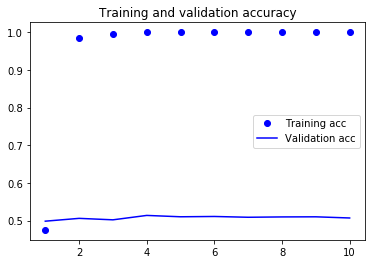

In [18]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

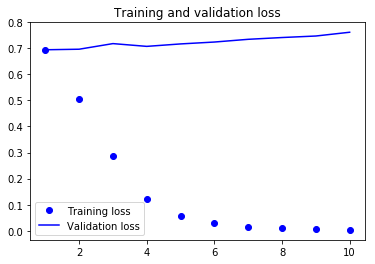

In [19]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

> Validation accuracy stalls in the low 50s. So in our case, pre-trained word
embeddings does outperform jointly learned embeddings. If you increase the number of
training samples, this will quickly stop being the case—try it as an exercise.

验证准确率保持在刚过50。因此在这个情况下，预训练词嵌入确实超越了从头开始学习的嵌入方法。如果你增加训练样本的数量，结果很快将会出现反转，你可以用来作为一个练习。

> Finally, let’s evaluate the model on the test data. First, we will need to tokenize the
test data:

最后，让我们在测试数据上评测模型。首先我们还是需要标记化测试数据：

In [20]:
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            with open(os.path.join(dir_name, fname)) as f:
                texts.append(f.read())
            labels.append(0 if label_type == 'neg' else 1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

> And let’s load and evaluate the first model:

然后载入第一个模型（预训练词嵌入）来进行验证：

In [21]:
model.load_weights('models/pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 1s 40us/sample - loss: 0.8338 - acc: 0.5445


[0.8337983791255951, 0.54448]

> We get an appalling test accuracy of 56%. Working with just a handful of training
samples is hard!

得到了大约54%的测试准确率。使用很少的训练数据是非常困难的！

### 6.1.4 小结

> Wrapping up: now you are be able to...

> - Turn raw text into something that a neural network can process.
- Use the Embedding layer in a Keras model to learn task-specific token embeddings.
- Leverage pre-trained word embeddings to get an extra boost on small natural language
processing problems.

本小节中我们了解了：

- 如何将原始文本转换成神经网络能够处理的数据。
- 在Keras模型中使用嵌入层来学习任务相关的标记化嵌入方法。
- 应用预训练的词嵌入方法来作为小型自然语言处理问题的额外方式。

## 6.2 理解循环神经网络

> A major characteristic of all neural networks that you have seen so far, such as
densely-connected networks and convnets, is that they had no memory. Each input shown
to them gets processed independently, with no state kept in between inputs. With such
networks, in order to process a sequence or a temporal series of data points, you have to
show the entire sequence to the network at once, i.e. turn it into a single datapoint. For
instance, this is what we have been doing in our IMDB example: an entire movie review
would get transformed into a single large vector, and would be processed in one go. Such
networks are called "feedforward networks".

目前我们学习过的所有神经网络的一个共同特点就是它们都没有记忆，包括全连接网络和卷积网络。每一个输入给它们的数据都是独立进行处理的，在这些输入数据之间不存在这任何状态。要在这样的网络上处理一个序列或者时间序列数据，你就不得不一次性的将整个序列输入给网络，也就是说将序列转换成单个的数据点。正如我们在IMDB例子中做的那样：一整个电影评论被转换称为一个大的向量，然后在一次过程中整个被网络进行处理。这样的网络被称为“前馈网络”。

> By contrast, as you are reading the present sentence, you are processing it word by
word, or rather, eye saccade by eye saccade, while keeping around memories of what
came before—a fluid representation of the meaning that I am conveying with this
sentence. Biological intelligence processes information incrementally while maintaining
an internal model of what it is processing, built from past information and constantly
getting updated as new information comes in.

相对的，你在阅读这段文字的时候，是一个单词一个单词的进行处理的，或者更确切的说，是眼睛依次扫视下去的，同时你的大脑保留了前面扫视过的内容的记忆，也就是说你阅读本段文字时有着流动的表现形式。生物智慧在处理信息是是渐进式的，会保留一个内在的模型用来处理这些信息，当前模型的状态是由过去的信息决定的，并且能够持续的根据新的信息来进行更新。

> Recurrent Neural Networks (RNNs) adopt the same principle, albeit in an extremely
simplified version: they process sequences by iterating through the sequence elements
and maintaining a "state" containing information relative to what they have seen so far.
In effect, RNNs are a type of neural network that has an internal loop (Figure 6.8). The
state of the RNN is reset in-between processing two different, independent sequences
(e.g. two different IMDB reviews), so we still consider one sequence as a single
datapoint, a single input to the network—what changes is that this datapoint is no longer
processed in a single step, rather, the network internally loops over sequence elements.

循环神经网络（RNN）采用了同样的原理，尽管只是一个极端简化后的版本：它们使用迭代式的方法处理序列中的元素并且使用一个内部的状态保存过程中已经处理的信息。效果上，RNN是神经网络的一种类型，它有一个内部的循环（图6-8）。这里的状态会在处理两个不同的独立的序列之间进行重置（例如两个不同的IMDB评论），因此我们仍然可以将一个序列考虑为一个单独的数据点，也就是网络的一个单独的数据，这里不同的只是这个数据点不再是一次处理完，而是网络内部会循环处理序列中的元素。

![RNN](imgs/f6.8.jpg)

图6-8 循环神经网络

> To make these notions of loop and state completely clear, let’s implement the forward
pass of a toy RNN in Numpy. This RNN takes as input a sequence of vectors, which we
will encode as a 2D tensor of size (timesteps, input_features) . It loops over
timesteps, and at each timestep, it considers its current state at t , the input at t (of shape
(input_features,) , and combines them to obtain the output at t . We then set the state
for the next step to simply be this previous output. For the very first timestep, the
"previous output" is not defined, hence there is no "current state", so we will initialize the
state as an all-zero vector, called the "initial state" of the network.

为了更加清晰的阐述循环的概念，我们在Numpy中实现一个玩具RNN的前向过程。这个RNN接受一个向量序列作为输入，我们会将它编码成一个形状为(时间步长, 输入特征)的2D张量。这个网络在时间步长上进行循环，在每个时间步长上，都会根据t时刻的内部状态和t时刻的输入值（形状为(输入特征,)的向量），结合一起计算得到t时刻的输出值。然后我们简单将下一步的状态值设置上次的输出值。在第一步时，“上一次输出”是未定义的，因此这时没有“当前状态”，我们可以将这时的状态初始化为全零的向量，称为网络的“初始化的状态”。

> In pseudo code, this is our RNN:

我们用下面的伪代码实现这个RNN：

In [ ]:
state_t = 0 # 状态值，初始化为0

for input_t in input_sequence: # 在输入序列上循环迭代
    output_t = f(input_t, state_t) # 这里的`f`是每一次迭代用来计算输出的函数
    state_t = output_t # 将当前状态更新为输出值

> We can even flesh out a bit the function f : the transformation of the input and state
into an output will be parametrized by two matrices, W and U, and a bias vector. It is
very similar to the transformation operated by a densely connected layer in a feedforward
network.

我们还可以进一步定义函数f：这里涉及两个网络的权重张量，W和U，还有一个额外的偏置向量。这个数学形式非常类似我们前面学习过的前馈网络中的全连接层。

In [ ]:
state_t = 0

for input_t in input_sequence:
    output_t = activation(dot(W, input_t) + dot(U, state_t) + b)
    state_t = output_t

> To make these notions absolutely unambiguous, let’s go ahead and write down a
naive Numpy implementation of the forward pass of our simple RNN.

下面我们继续写出这个简单的RNN网络的Numpy玩具代码，进一步帮助我们理解这些概念。

In [24]:
timesteps = 100 # 输入序列的时间步长
inputs_features = 32 # 输入特征空间维度
output_features = 64 # 输出特征空间维度

# 这是我们的输入数据，使用随机张量作为例子
inputs = np.random.random((timesteps, inputs_features))

# 这是我们初始化的状态，全零向量
state_t = np.zeros((output_features,))

# 随机产生权重张量W、U和偏置向量b
W = np.random.random((output_features, inputs_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))

successive_outputs = []
for input_t in inputs: # input_t是形状为(input_features,)的向量
    
    # 结合当前输入，当前状态和偏置计算得到输出向量
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
    
    # 把当前输出向量添加到结果列表中
    successive_outputs.append(output_t)
    
    # 更新下一次迭代的状态值
    state_t = output_t

# 将每一次迭代的输出向量连接成一个形状为(timesteps, output_features)的张量
final_output_sequence = np.concatenate(successive_outputs, axis=0)

> Easy enough: in summary, a RNN is just a for loop that reuses quantities computed
during the previous iteration of the loop . Nothing more. Of course, there are many
different RNNs fitting this definition that one could build—the example we just showed
is one of the simplest RNN formulations out there. RNNs are characterized by their "step
function", e.g. in our case, the function:

很简单吧：总的来说，RNN就是一个for循环来重用前面迭代过程中计算得到的结果。当然，满足这个要求的RNN种类有很多，例如上面的例子就展示了一种最简单的RNN网络。不同的RNN由其独特的“步长函数”来决定，也就是我们例子中的函数：

```python
output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
```

![simple RNN](imgs/f6.9.jpg)

图6-9：随着时间展开的一个简单RNN

> Note: in our example, the final output is a 2D tensor of shape (timesteps,
output_features) , where each timestep is the output of the loop at time t . Each
timestep t in the output tensor contains information about timesteps 0 to t in the input
sequence—about the entire past. For this reason, in many cases you don’t need this full
sequence of outputs, you just need the very last output ( output_t at the end of the loop),
since it already contains information about the entire sequence.

还需要注意一点：在我们的例子中，最终输出的是一个2D张量，形状为(时间步长, 输入特征维度)，里面每个步长就是在时刻t上输出。输出张量中的每个步长t都包含着时刻0到t输入的信息，也就是全部的过去。正因为此，很多情况下你并不需要完整的输出序列，仅仅需要最后的输出（也就是迭代最后一步时刻t的输出）。因为它已经包含了整个序列的信息。

### 6.2.1 使用Keras的第一个RNN

> The process we just naively implemented in Numpy corresponds to an actual Keras layer:
the SimpleRNN layer:

上面我们用原始的Numpy代码实现的过程对应着Keras的层，`SimpleRNN`层：

```python
from tensorflow.keras.layers import SimpleRNN
```

> There is just one minor difference: SimpleRNN processes batches of sequences, like
all other Keras layers, not just a single sequence like in our Numpy example. This means
that it takes inputs of shape (batch_size, timesteps, input_features) , rather than
(timesteps, input_features) .

两者之间只有一个细微的差别：SimpleRNN处理的是一批次的序列，就像其他Keras层一样，而我们上面的玩具例子只是处理单个的序列。这意味这它接收的输入张量形状为(批次数量, 时间步长, 输入特征维度)，而不是(时间步长, 输入特征维度)。

> Like all recurrent layers in Keras, SimpleRNN can be run in two different modes: it
can return either the full sequences of successive outputs for each timestep (a 3D tensor
of shape (batch_size, timesteps, output_features) ), or it can return only the last
output for each input sequence (a 2D tensor of shape (batch_size,
output_features) ). These two modes are controlled by the return_sequences
constructor argument. Let’s take a look at an example:

与所有Keras中的循环层一样，SimpleRNN可以运行在两种模式下：一是输出所有时间步长的完整序列，形成一个形状为(批次数量, 时间步长, 输出特征维度)的3D张量；二是仅输出最后结果，形成一个形状为(批次数量, 输出特征维度)的张量。使用哪种模式可以使用`return_sequences`参数进行控制。让我们看一下例子：

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [26]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


> It is sometimes useful to stack several recurrent layers one after the other in order to
increase the representational power of a network. In such a setup, you have to get all
intermediate layers to return full sequences:

有的情况下，为了增加网络的表现能力需要将多个循环层堆叠在一起。这样的话，除了最后一个循环层以外的中间层都需要返回完整的序列：

In [27]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


> Now let’s try to use such a model on the IMDB movie review classification problem.
First, let’s preprocess the data:

现在我们可以尝试使用这样的模型在解决IMDB影评分类问题。首先，让我们预处理数据：

In [28]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_features = 10000 # 词汇表最大单词数量
maxlen = 500 # 最多取前500个单词
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


> Let’s train a simple recurrent network using an Embedding layer and a SimpleRNN
layer:

下面我们用一个简单的嵌入层和SimpleRNN层加上全连接分类器来进行训练：

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train, batch_size=batch_size, epochs=10, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 65s 3ms/sample - loss: 0.5159 - acc: 0.7383 - val_loss: 0.4064 - val_acc: 0.8304
Epoch 2/10
20000/20000 [==============================] - 58s 3ms/sample - loss: 0.3610 - acc: 0.8511 - val_loss: 0.5006 - val_acc: 0.7932
Epoch 3/10
20000/20000 [==============================] - 56s 3ms/sample - loss: 0.3178 - acc: 0.8736 - val_loss: 0.3407 - val_acc: 0.8622
Epoch 4/10
20000/20000 [==============================] - 57s 3ms/sample - loss: 0.2689 - acc: 0.8953 - val_loss: 0.3963 - val_acc: 0.8336
Epoch 5/10
20000/20000 [==============================] - 57s 3ms/sample - loss: 0.2433 - acc: 0.9077 - val_loss: 0.3537 - val_acc: 0.8518
Epoch 6/10
20000/20000 [==============================] - 56s 3ms/sample - loss: 0.2114 - acc: 0.9212 - val_loss: 0.3674 - val_acc: 0.8590
Epoch 7/10
20000/20000 [==============================] - 62s 3ms/sample - loss: 0.1889 - acc: 0.9281 - val_loss: 0.4

> Let’s display the training and validation loss and accuracy:

我们把训练和验证损失及准确率绘制出来：

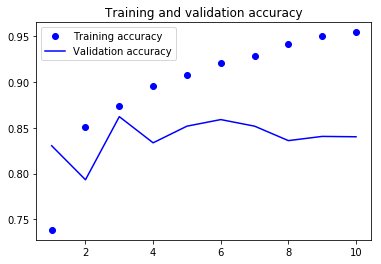

In [30]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b-', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

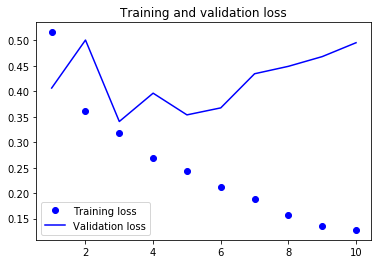

In [31]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b-', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

> As a reminder, in chapter 3, our very first naive approach to this very dataset got us to
88% test accuracy. Unfortunately, our small recurrent network doesn’t perform very well
at all compared to this baseline (only up to 85% validation accuracy). Part of the problem
is that our inputs only consider the first 500 words rather the full sequences—hence our
RNN has access to less information than our earlier baseline model. The remainder of the
problem is simply that SimpleRNN isn’t very good at processing long sequences, like
text. Other types of recurrent layers perform much better. Let’s take a look at some more
advanced layers.

回忆一下，在第三章中，我们第一个使用简单的网络来处理这个数据集获得了88%的测试准确率。不幸的是，这个小型的循环网络对比起来却达不到基线（只能获得约85%的准确率）。部分的原因是我们输入仅考虑了前500个单词而不是整个评论，因此我们的RNN接触到的信息少于前面的那个网络。另外一个原因就是SimpleRNN并不善于处理长的句子，比方说整段的文本。其他的循环层能够达到好很多的性能。下面我们就来看一下这些更加先进的循环层。

### 6.2.2 了解LSTM和GRU

> SimpleRNN isn’t the only recurrent layer available in Keras: there are two more, LSTM
and GRU . In practice, you will always be using one of these two, as SimpleRNN is
generally too simplistic to be of any real use. Indeed, SimpleRNN has a major issue: albeit
it should theoretically be able to retain at time t information about inputs seen many
timesteps before, in practice such long-term dependencies prove to be impossible to
learn. This is due to the "vanishing gradient problem", an effect that is similar to what
can be observed with non-recurrent networks (feedforward networks) that are many
layers deep: as one keeps adding layers to a network, the network eventually becomes
un-trainable. The theoretical reasons for this effect have been studied by Hochreiter,
Schmidhuber, and Bengio in the early 1990s. The LSTM and GRU layers are designed to
solve this very problem.

SimpleRNN并不是Keras中唯一的循环层：还有两个，分别是LSTM和GRU。在实践中，你应该总是使用这两个中的一个，因为SimpleRNN对于真实数据来说结构过于简单了。实际上，SimpleRNN有一个主要的问题：尽管理论上他可以在时刻t保存着之前所有的信息，但是实际上这么长时期的依赖被证明是无法做到的。这是因为存在“梯度消失问题”，这是在非循环网络（前馈网络）当中也同样存在问题：当不断在网络中添加层次的时候，最终整个网络会变成无法训练。这个效应产生的原因在1990年早期就已经被Hochreiter，Schmidhuber和Bengio研究了。LSTM和GRU层的出现正是为了解决这个问题。

> Let’s consider the LSTM layer. The abbreviation stands for "Long-Short Term
Memory". The underlying algorithm was developed by Hochreiter and Schmidhuber in
1997, the culmination of their research on the vanishing gradient problem.

我们来看一下LSTM层。它代表着“长短期记忆”的缩写。LSTM是1997年由Hochreiter和Schmidhuber发明的算法，当时正是研究梯度消失问题的巅峰时期。

> It is a variant of the simple RNN you already know about, that adds a way to carry
information across many timesteps. Imagine a conveyor belt running parallel to the
sequence we are processing. Information from the sequence can jump on the conveyor
belt on at any point, get transported to a later timestep, and jump off, intact, when we
need it. This is essentially what LSTM does: it saves information for later, thus
preventing older signals to gradually vanish during processing.

LSTM是我们已经看到的SimpleRNN的一个变体，它加入了一种方法能够在网络中携带很多时间步长的信息。设想一个传送带运行在与我们要处理的序列的相同方向上。序列上的信息可以在任何点上进入传送带，并传输到后续的时刻，如果需要的话，也可以完整的移出传送带。这就是LSTM基本的原理：它保存了后续需要的信息，从而避免了之前的信息在处理过程中逐渐消失。

> To understand it detail, let’s start from our simple RNN cell. Because we are going to
have a lot of weight matrices, we will index our W and U matrices in the cell with the
letter o ( Wo and Uo ). It’s for "output".

为了深入理解，我们从最简单的SimpleRNN开始。因为下面将会出现许多权重矩阵，我们为下面图中的W和U矩阵增加了下标o（Wo和Uo）。o代表“输出”。

![LSTM start: SimpleRNN](imgs/f6.12.jpg)

图6-12：从SimpleRNN开始理解LSTM

> Let’s literally add to this picture an additional data flow that carries information
across timesteps. We’ll call its values at different timesteps Ct , C standing for "carry".
This information will have the following impact on the cell: it will get combined with the
input connection and the recurrent connection (via a dense transformation, i.e. a dot
product with a weight matrix followed by a bias add and the application of an activation
function), and it affects the state being sent to the next timestep (via an activation
function an a multiplication operation). Conceptually, our "carry" dataflow is simply a
way to modulate the next output and the next state. Super simple so far.

我们为上图额外增加一条数据通道，用来在所有的时间步长上携带信息。我们把这条通道上携带的数据值称为Ct，这里C代表“携带”。这条额外通道上数据会与当前时刻输入以及循环状态结合（结合方式与全连接层相同，也就是分别与权重矩阵进行点积，加上偏置向量后，最后应用激活函数得到输出），并且还会影响到下一时刻的状态值（通过一个乘法后应用激活函数得到）。概括来说，这条额外的数据通道就是对下一个输出和状态的调节器。目前为止非常简单。

![LSTM: add carry dataflow](imgs/f6.13.jpg)

图6-13：LSTM：增加一条携带数据的通道

> Now the subtlety: the way the next value of the carry dataflow is computed. It
involves 3 distinct transformations. All three have the form of a simple RNN cell, i.e.:

现在来看看细节：计算得到携带数据通道下一个值的方法涉及到3个独立转换。三个转换均具有以下的SimpleRNN的形式，也就是：

```python
y = activation(dot(state_t, U) + dot(input_t, W) + b)
```

> But all three transformations have their own weight matrices, which we will index by
the letters i , f , and k . Let’s write down what we have so far (it may seem a bit arbitrary,
but bear with me):

但是三个转换有着它们自己的权重矩阵，我们先用下标i, f和k标注它们。我们先写下来（这看起来莫名其妙，但是请忍耐一下）：

```python
output_t = activation(dot(state_t, Uo) + dot(input_t, Wo) + dot(C_t, Vo) + bo)

i_t = activation(dot(state_t, Ui) + dot(input_t, Wi) + bi)
f_t = activation(dot(state_t, Uf) + dot(input_t, Wf) + bf)
k_t = activation(dot(state_t, Uk) + dot(input_t, Wk) + bk)
```

> We obtain the new carry state (the next c_t ) by simply combining i_t , f_t and k_t :

然后只需要将上面三个值用下面的式子计算即可获得下一次的携带状态：

```python
c_t+1 = i_t * k_t + c_t * f_t
```

> Let’s add this to our figure:

然后将这个部分加入到图中：

![LSTM: Anatomy](imgs/f6.14.jpg)

图6-14：LSTM：剖析图

> That’s it. Not so complicated after all, merely a tad complex.

完成了。并没有那么复杂。

> Now if we want to get all philosophical, we can start interpreting what each of these
operations are "meant" to do. For instance, one might say that multiplying c_t with f_t
is a way to deliberately "forget" some irrelevant information in the carry dataflow.
Meanwhile i_t and k_t provide information about the present, updating the carry track
with new information. However, at the end of the day, these interpretations may not
mean much, because what these operations actually do is determined by contents of the
weights parametrizing them, and the weights are learned in an end-to-end fashion, anew
with each training round, making it impossible to credit this or that operation with a
specific purpose. The specification of a RNN cell (what we just described above)
determines your hypothesis space—the space in which you will search for a good model
configuration during training—but it does not determine what the cell does; that is up to
the cell weights. A same cell with different weights can be doing very different things. So
the combination of operations making up a RNN cell is a better interpreted as set of
constraints on your search, not as a design in an engineering sense.

现在如果我们希望深度理解，我们可以去解读这些操作的每一步想要干嘛。例如，可以认为将c_t和f_t相乘是一种故意“忘记”在携带数据流上一些非相关信息的方法。而i_t和k_t提供了有关现在的信息，并根据最新的信息来更新携带数据通道的内容。然而最终我们会发现，这些解释并没有提供更加深入的了解，因为这些操作的结果实际上是由权重来决定的，但是这些权重参数是按照端对端的方式学习到的，在每次训练过程中进行更新，这使得确切解释每个操作的目标都是不可能的。一个RNN网格的规范（我们前面描述的）定义了你的假设空间，也就是训练过程中你希望获得的良好模型所处的空间，但是规范中并没有定义每个网格的功能，因为这取决于网格中的权重。一个具有不同权重的相同网格会产生完全不同的结果。因此将RNN网格中的一系列操作联合起来解释称为一组对于在假设空间中的搜索行为约束，会是一个更加理想的解读，这有点违背我们工程学上设计的直觉。

> As a researcher, it seems to me that the choice of such constraints—the question of
how to implement RNN cells—is better left to optimization algorithms (like genetic
algorithms or reinforcement learning processes) than to human engineers. And in the
future, that’s how we will build our networks anyway. In summary: you don’t need to
understand anything about the specific architecture of a LSTM cell; as a human, it
shouldn’t be your job to understand it. Just keep in mind what the LSTM cell is meant to
do: allowing past information to be reinjected at a later time, thus fighting the vanishing
gradient problem.

作为一个研究人员，在作者看来这些约束的选择，也就是如何实现RNN网格，更适合留给优化算法（如遗传算法或强化学习过程）来考虑而不是人类工程师。后续我们也是直接使用它们来构建我们的网络。总结来说：你不需要纤细理解特定的LSTM结构的所有内容。作为人类而言，这不是你的任务。只需要记住LSTM的原理：能够允许过去的信息重新输入到网络中，从而能够解决梯度消失问题。

### 6.2.3 一个具体的Keras中LSTM例子

> Now let’s switch to more practical concerns: we will set up a model using a LSTM layer
and train it on the IMDB data. Here’s the network, similar to the one with SimpleRNN
that we just presented. We only specify the output dimensionality of the LSTM layer, and
leave every other argument (there are lots) to the Keras defaults. Keras has good defaults,
and things will almost always "just work" without you having to spend time tuning
parameters by hand.

下面我们转为考虑更加实际的问题：我们将使用LSTM层来在IMDB数据上进行训练。将会使用一个与前面SimpleRNN例子相似的网络。在其中我们只制定了LSTM层的输出维度，其他参数（有很多）采用Keras的默认值。Keras都有着良好的默认值，使用它们基本上都能让任务“可以工作”，而不用话费大量手工调整参数的时间。

In [32]:
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 32s 2ms/sample - loss: 0.5233 - acc: 0.7508 - val_loss: 0.4350 - val_acc: 0.7982
Epoch 2/10
20000/20000 [==============================] - 30s 1ms/sample - loss: 0.3000 - acc: 0.8803 - val_loss: 0.3198 - val_acc: 0.8708
Epoch 3/10
20000/20000 [==============================] - 31s 2ms/sample - loss: 0.2401 - acc: 0.9083 - val_loss: 0.2977 - val_acc: 0.8774
Epoch 4/10
20000/20000 [==============================] - 31s 2ms/sample - loss: 0.2017 - acc: 0.9250 - val_loss: 0.3288 - val_acc: 0.8506
Epoch 5/10
20000/20000 [==============================] - 31s 2ms/sample - loss: 0.1816 - acc: 0.9346 - val_loss: 0.2982 - val_acc: 0.8766
Epoch 6/10
20000/20000 [==============================] - 31s 2ms/sample - loss: 0.1601 - acc: 0.9434 - val_loss: 0.3181 - val_acc: 0.8608
Epoch 7/10
20000/20000 [==============================] - 31s 2ms/sample - loss: 0.1480 - acc: 0.9483 - val_loss: 0.7

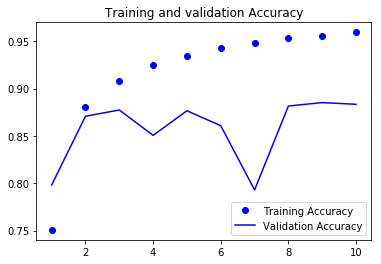

In [33]:
train_acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, 11)

plt.plot(epochs, train_acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b-', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.legend()

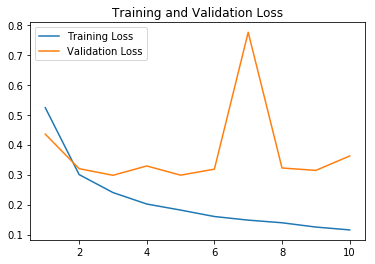

In [34]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

> Here’s what we are getting this time: up to 89% validation accuracy. Not bad:
certainly much better than the SimpleRNN network—that’s largely because LSTM suffers
much less from the vanishing gradient problem—and even slightly better than our
fully-connected approach from chapter 3, even though we are looking at less data than
we were in chapter 3—we are truncating sequences after 500 timesteps, whereas in
chapter 3 we were considering full sequences.

这里我们获得了高达89%的验证准确率。相当不错：绝对优于SimpleRNN的网络，这大体上因为LSTM很少受到梯度消失问题的影响，而且也比之前第三章我们使用的那个全连接网络的性能要高，甚至在我们比第三章使用了更少的数据量的情况下，我们在LSTM网络中仅使用了评论中的前500个单词（时间步长），但是在第三章中我们使用了全部评论的内容。

> However, it’s not groundbreaking either for such a computationally intensive
approach. Why isn’t our LSTM performing better? One reason is that we did no effort to
tune hyperparameters such as the embeddings dimensionality or the LSTM output
dimensionality. Another may be lack of regularization. But honestly, the reason is mostly
that analysing the global, long-term structure of the reviews (what LSTM is really good
at) isn’t very helpful for a sentiment analysis problem. Such a basic problem is very well
solved by simply looking at what words occur in each review, and at what frequency.
That’s what our first fully-connected approach was looking at. But there are far more
difficult natural language processing problems out there, where the strength of LSTM
will become apparent: in particular, question answering and machine translation.

但是上述方案并未实现创造性的突破。为什么我们的LSTM没有表现的更好？其中一个原因是我们没有调整超参数比如嵌入维度或者LSTM输出维度，另一个原因可能是因为缺少正则化。但是实际上的主要原因是对评论进行全局和长期的分析（这是LSTM最擅长的领域）对我们的目标任务情绪分析问题并没有特别大的帮助。这样一个基本的问题可以在每个评论中查找特定的单词以及它们出现的频率简单的获得结果。这是我们第一个全连接方法的做法。实际场景中还有更多更复杂的自然语言处理问题，LSTM可以在其中体现它的强大：特别是回答问题和机器翻译。

### 6.2.3 小结

> To wrap up—now you understand:

> - What RNNs are, and how they work.
- What LSTM is, and why it works better on long sequences than a naive RNN.
- How to use Keras RNN layers to process sequence data.

本小节你学习到了：

- RNN是什么，它们如何工作的。
- LSTM是什么，为什么它在长句子上会比原始RNN工作的更好。
- 如何使用Keras RNN层来处理序列数据。

> Next, we will review a number of more advanced features of RNNs, to get the most
out of your deep learning sequence models.

下一节中，我们将会学些一些更加高级的RNN特性，用来在你的深度学习序列模型中提取更多信息。

## 6.3 循环神经网络的高级用法

> In this section, we will review three advanced techniques for improving the performance
and generalization power of recurrent neural networks. By the end of the section, you
will know most of what there is to know about using recurrent networks with Keras. We
will demonstrate all three concepts on a weather forecasting problem, where we have
access to a timeseries of data points coming from sensors installed on the roof of a
building, such as temperature, air pressure, and humidity, which we use to predict what
the temperature will be 24 hours after the last data point collected. This is a fairly
challenging problem that exemplifies many common difficulties encountered when
working with timeseries.

在本小节中，我们会覆盖三种高级技巧，用来提升循环神经网络的性能和泛化能力。学习完本小节后，你就了解了大部分在Keras使用RNN的内容。我们会在一个天气预测问题上展示所有的三个概念，我们会使用一个时间序列的数据点，来自安装在建筑物顶部的传感器采集的那些气象数据，例如温度，大气压和湿度。然后我们用这些时间序列数据来预测最后一个数据点未来24个小时的气温。这是一个相当有挑战的问题，涵盖了许多时间序列问题都会碰到的难点。

> We will cover the following techniques:

> - Recurrent dropout, a specific, built-in way to use dropout to fight overfitting in recurrent
layers.
- Stacking recurrent layers, to increase the representational power of the network (at the
cost of higher computational loads).
- Bidirectional recurrent layers, which presents the same information to a recurrent
network in different ways, increasing accuracy and mitigating forgetting issues.

本节会介绍到下面这些技巧：

- 循环dropout，一种特定内建的方式使用dropout来对抗循环层中的过拟合。
- 堆叠循环层，从而增加网络的空间表现能力（当然付出更加昂贵的计算代价）。
- 双向循环层，可以在不同方向上为循环神经网络提供相同的信息，从而增加准确率和降低遗忘问题。

### 6.3.1 气温预测问题

> Until now, the only sequence data we have covered has been text data, for instance the
IMDB dataset and the Reuters dataset. But sequence data is found in many more
problems than just language processing. In all of our examples in this section, will be
playing with a weather timeseries dataset recorded at the Weather Station at the
Max-Planck-Institute for Biogeochemistry in Jena, Germany.

目前为止我们接触到的序列数据都是文本数据，例如IMDB数据集和路透社数据集。但实际上序列数据在现实世界中有很多，而不仅仅是语言处理。在本小节我们的例子中，将会用到一个天气时间序列数据集，来自德国耶拿的马克斯·普朗克生物地球化学研究所的气象站采集的天气数据。

注：数据来源https://www.bgc-jena.mpg.de/wetter/

> In this dataset, fourteen different quantities (such air temperature, atmospheric
pressure, humidity, wind direction, etc.) are recorded every ten minutes, over several
years. The original data goes back to 2003, but we limit ourselves to data from
2009-2016. This dataset is perfect for learning to work with numerical timeseries. We
will use it to build a model that takes as input some data from the recent past (a few days
worth of data points) and predicts the air temperature 24 hours in the future.

在这个数据集中，一共有14个不同的测量值（比如气温、气压、湿度、风向等），这些值都是每10分钟记录一次，一共覆盖了几年的跨度。原始数据可以回溯到2003年，不过这里我们将数据跨度限制在2009-2016年间。这个数据集是用来学习处理数值型时间序列的完美工具。我们会使用它来构建一个模型，接受最近的一些测量值作为输入（几天的数据），然后预测未来24小时的气温。

> The data can be downloaded and uncompressed via e.g.:

这个数据集可以从下面地址下载并解压：

```bash
cd ~/data
mkdir jena_climate
cd jena_climate
wget https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
unzip jena_climate_2009_2016.csv.zip
```

> Let’s take a look at the data:

让我们粗略浏览一遍数据集：

In [35]:
import os

data_dir = os.path.join(os.environ['HOME'], 'data', 'jena_climate')
fname = os.path.join(data_dir, 'jena_climate_2009_2016.csv')

with open(fname) as f:
    data = f.read()

lines = data.split('\n')
header = lines[0].split(',')
lines = lines[1:]

print(header)
print(len(lines))

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420451


> This outputs a count of 420,551 lines of data (each line is a timestep, i.e. a record of a
date and 14 weather-related values), as well as the following header:

上面输出了数据行数420551（每一行都是一个时间步长，也就是一个时间点上的14个天气相关的测量值）和表头内容。

> Let’s convert all of these 420,551 lines of data into a Numpy array:

然后我们将这些420551行数据转换成一个Numpy矩阵：

In [36]:
import numpy as np

float_data = np.empty((len(lines), len(header) - 1))

for i, line in enumerate(lines):
    values = [float(v) for v in line.split(',')[1:]]
    float_data[i, :] = values

> For instance, here is the plot of temperature (in degrees Celsius) over time:

例如，下面绘制出气温（摄氏度）随着时间变化的图：

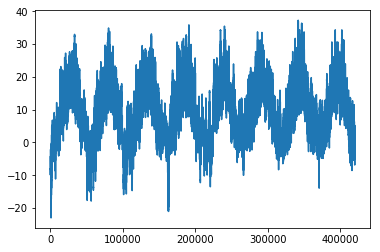

In [37]:
import matplotlib.pyplot as plt

temp = float_data[:, 1] # 气温是数据中的第二列
plt.plot(range(len(float_data)), temp)

> On this plot, you can clearly see the yearly periodicity of temperature.

> Here is a more narrow plot of the first ten days of temperature data (since the data is
recorded every ten minutes, we get 144 data points per day):

在这张图上，你可以清楚看到气温随着年度变化的趋势情况。

下面是一章更加狭窄的范围的气温图像，只画出了前十天（因为数据每10分钟记录一次，所以每天一共有144个数据点）的气温情况：

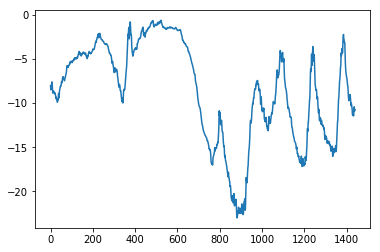

In [38]:
plt.plot(range(1440), temp[:1440])

> On this plot, you can see daily periodicity, especially evident for the last 4 days. We
can also note that this ten-days period must be coming from a fairly cold winter month.

在这幅图上，你可以看到按照每天的周期变化情况，特别是后四天。我们也可以注意到这10天应该是来自气温相当低的冬天时期。

> If we were trying to predict average temperature for the next month given a few
month of past data, the problem would be easy, due to the reliable year-scale periodicity
of the data. But looking at the data over a scale of days, the temperature looks a lot more
chaotic. So is this timeseries predictable at a daily scale? Let’s find out.

如果我们尝试从前面几个月的数据来预测下个月的平均气温的话，这个问题会比较容易，因为数据呈现了很稳定的年度周期性。但是如果只是观察几天的数据的话，气温呈现了很多的随机性。那么这样的时间序列是否可以用来对下一天进行预测？我们马上来尝试一下。

### 6.3.2 数据预处理

> The exact formulation of our problem will be the following: given data going as far back
as lookback timesteps (a timestep is 10 minutes) and sampled every steps timesteps,
can we predict the temperature in delay timesteps?

我们可以依照一下方式给出这个问题的数学定义：给定数据回溯至`lookback`时间步长（每个时间步长是10分钟）和每个步长的取样数据，能否预测后续`delay`时间步长上的数据？

> We will use the following parameter values:

> - lookback = 720 , i.e. our observations will go back 5 days.
- steps = 6 , i.e. our observations will be sampled at one data point per hour.
- delay = 144 , i.e. our targets will be 24 hour in the future.

我们将会采用下面的参数值：

- lookback = 720，也就是说我们会回溯5天的数据。
- steps = 6，也就是说我们会在每个小时采样成一个数据点。
- delay = 144，也就是说我们的目标是未来的24小时。

> To get started, we need to do two things:

> - Preprocess the data to a format a neural network can ingest. This is easy: the data is
already numerical, so we don’t need to do any vectorization. However each timeseries in
the data is one a different scale (e.g. temperature is typically between -20 and +30, but
pressure, measured in mbar, is around 1000). So we will normalize each timeseries
independently so that they all take small values on a similar scale.
- Write a Python generator that takes our current array of float data and yields batches of
data from the recent past, alongside with a target temperature in the future. Since the
samples in our dataset are highly redundant (e.g. sample N and sample N + 1 will have
most of their timesteps in common), it would be very wasteful to explicitly allocate every
sample. Instead, we will generate the samples on the fly using the original data.

开始之前，我们还需要准备两件事情：

- 将数据进行预处理成神经网络能够消化的格式。这很容易：拿到的原始数据已经是数值了，因此我们不需要进行向量化工作。但是数据集中的每个时间序列都处于不同的区间（例如温度一般是-20到+30，但是气压的单位毫巴，一般位于1000左右）。因此我们需要标准化每个时间序列，使得它们都在一致的区间中有着很小的数值。
- 在Python中编写一个生成器，将我们现有的浮点数数组转换成近期过去的批次数据，还要生成未来的目标气温。因为我们数据集中含有高度冗余的样本（例如样本N和样本N + 1在它们的时间步长上很多都是一样的），因此在内存中分配所有的样本是非常浪费的。相反，我们利用生成器实时将原始数据转换成样本。

> We preprocess the data by subtracting the mean of each timeseries and dividing by
the standard deviation. We plan on using the first 200,000 timesteps as training data, so
we compute the mean and standard deviation only on this fraction of the data:

数据预处理使用的方法是，将每个时间序列减去其均值然后除以其标准差。我们计划只使用前20万时间步长的数据作为训练集，因此我们只计算这段数据的均值和标准差：

In [39]:
mean = float_data[:200_000].mean(axis=0)
float_data -= mean
std = float_data[:200_000].std(axis=0)
float_data /= std

> Now here is the data generator that we will use. It yields a tuple (samples,
targets) where samples is one batch of input data and targets is the corresponding
array of target temperatures. It takes the following arguments:

> - data : The original array of floating point data, which we just normalized in the code
snippet above.
- lookback : How many timesteps back should our input data go.
- delay : How many timesteps in the future should our target be.
- min_index and max_index : Indices in the data array that delimit which timesteps to
draw from. This is useful for keeping a segment of the data for validation and another one
for testing.
- shuffle : Whether to shuffle our samples or draw them in chronological order.
batch_size : The number of samples per batch.
- step : The period, in timesteps, at which we sample data. We will set it 6 in order to draw
one data point every hour.

下面轮到要用到的数据生成器了。生成器产生的是一个元组(样本数, 目标值)，其中的样本数是一批次数据的量而目标值是该批次数据对应的目标气温。生成器接受下面的参数：

- data：原始输入的浮点数数组，就是上面我们标准化后的数据。
- lookback：输入数据回溯的时间步长数量。
- delay：我们要预测的目标时间步长数量。
- min_index和max_index：两个序号用来分割时间序列。准确来说就是为数据集分割验证集和测试集的。
- shuffle：是否随机排序或者按照时间顺序抽取样本批次。
- step：周期，一个周期时间步长数，用来取样数据。我们将其设置为6表示每小时取样一个数据点。

In [40]:
def generator(data, lookback, delay, min_index, max_index, 
              shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while True:
        if shuffle:
            rows = np.random.randint(min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)
        samples = np.zeros((len(rows), lookback // step, data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(row - lookback, row, step)
            samples[j] = data[indices]
            targets[j] = data[row + delay][1]
        yield samples, targets

> Now let’s use our abstract generator function to instantiate three generators, one for
training, one for validation and one for testing. Each will look at different temporal
segments of the original data: the training generator looks at the first 200,000 timesteps,
the validation generator looks at the following 100,000, and the test generator looks at the
remainder.

接下来我们使用上面定义的这个抽象的生成器来实现三个具体的生成器。分别对应着训练、验证和测试。每个生成器会从原始数据不同的时间区域抽取数据：训练生成器使用的是前20万个时间步长，验证生成器使用的是接下来的10万个时间步长，剩下的留给测试生成器。

In [41]:
lookback = 1440
step = 6
delay = 144
batch_size = 128

train_gen = generator(float_data, lookback=lookback,
                      delay=delay, min_index=0,
                      max_index=200000, shuffle=True,
                      step=step, batch_size=batch_size)

val_gen = generator(float_data, lookback=lookback,
                    delay=delay, min_index=200001,
                    max_index=300000, step=step,
                    batch_size=batch_size)

test_gen = generator(float_data, lookback=lookback,
                     delay=delay, min_index=300001,
                     max_index=None, step=step,
                     batch_size=batch_size)

# 这是从整个验证集抽取时间序列需要的步数
val_steps = (300000 - 200001 - lookback) // batch_size

# 这是从整个测试集抽取时间序列需要的步数
test_steps = (len(float_data) - 300001 - lookback) // batch_size

### 6.3.3 常识：非机器学习方法的基线

> Before we start leveraging black-box deep learning models to solve our temperature
prediction problem, let’s try out a simple common-sense approach. It will serve as a
sanity check, and it will establish a baseline that we will have to beat in order to
demonstrate the usefulness of more advanced machine learning models. Such
common-sense baselines can be very useful when approaching a new problem for which
there is no known solution (yet). A classic example is that of unbalanced classification
tasks, where some classes can be much more common than others. If your dataset
contains 90% of instances of class A and 10% of instances of class B, then a common
sense approach to the classification task would be to always predict "A" when presented
with a new sample. Such a classifier would be 90% accurate overall, and any
learning-based approach should therefore beat this 90% score in order to demonstrate
usefulness. Sometimes such elementary baseline can prove surprisingly hard to beat.

在开始使用黑盒深度学习模型来解决气温预测问题之前，让我们先常识一个简单的常识性方法。它可以作为其他方法的合理性检查，并且建立一个基线标准，当进入机器学习方法时，需要击败这个基线才能体现优势。这样的常识性基线方法在我们还没有获得解决方案之前是非常有必要的。其中一个典型的例子就是非平衡分类问题，其中某些分类比其它分类更加常见。比方说你有一个数据集包含了90%的分类A和10%的分类B，那么你一个常识性的方法当遇到新的样本时应该永远预测为分类A。这样的基线分类器将会具有90%的准确率，因此任何真正有效的其他方式应该至少超过90%准确率。有的情况下这种常识性的基线可能很难被击败。

> In our case, the temperature timeseries can safely be assumed to be continuous (the
temperatures tomorrow are likely to be close to the temperatures today) as well as
periodical with a daily period. Thus a common sense approach would be to always
predict that the temperature 24 hours from now will be equal to the temperature right
now. Let’s evaluate this approach, using the Mean Absolute Error metric (MAE). Mean
Absolute Error is simply equal to:

在这个例子中，气温时间序列可以很安全的被认为是连续的（明天的气温很大可能接近今天的气温）并且在一天中展现周期性。因此一个合适的常识性方法可以永远认为24小时后的气温等于当前气温。我们使用平均绝对误差（MAE）来验证这种方法。MAE很简单：

```python
np.mean(np.abs(preds - targets))
```

> Here’s our evaluation loop:

然后使用循环进行验证：

In [42]:
def evaluate_naive_method():
    batch_maes = []
    for step in range(val_steps):
        samples, targets = next(val_gen)
        preds = samples[:, -1, 1]
        mae = np.mean(np.abs(preds - targets))
        batch_maes.append(mae)
    print(np.mean(batch_maes))
evaluate_naive_method()

0.2897359729905486


> It yields a MAE of 0.29. Since our temperature data has been normalized to be
centered on 0 and have a standard deviation of one, this number is not immediately
interpretable. It translates to an average absolute error of 0.29 * temperature_std
degrees Celsius, i.e. 2.57°C. That’s a fairly large average absolute error—now the game
is to leverage our knowledge of deep learning to do better.

上面得到的MAE约为0.29。因为我们已经将气温标准化，其均值为0，标准差为1，这个数值并不太直观。可以使用0.29 × 原始气温标准差将其转换原始平均绝对误差（单位摄氏度），也就是2.57°C。会得到一个较大的平均绝对误差。下面该轮到深度学习上场了。

In [43]:
celcius_mae = 0.29 * std[1]
celcius_mae

2.5672247338393395

### 6.3.4 一个基本的机器学习方法

> In the same way that it is useful to establish a common sense baseline before trying
machine learning approaches, it is useful to try simple and cheap machine learning
models (such as small densely-connected networks) before looking into complicated and
computationally expensive models such as RNNs. This is the best way to make sure that
any further complexity we throw at the problem later on is legitimate and delivers real
benefits.

正如我们可以在尝试机器学习方法之前构建一个常识性的基线一样，我们也可以先尝试构建一个简单而便宜的机器学习模型（如小型全连接网络），然后才开始构建复杂而需要大量计算资源的模型如RNN。这才能证明后续的这种复杂度的付出是必要的并且能获得更好的结果。

> Here is a simply fully-connected model in which we start by flattening the data, then
run it through two Dense layers. Note the lack of activation function on the last Dense
layer, which is typical for a regression problem. We use MAE as the loss. Since we are
evaluating on the exact same data and with the exact same metric as with our common
sense approach, the results will be directly comparable.

下面是一个简单的全连接模型，首先我们铺平数据，然后将其输入到两个全连接层。请注意最后一个全连接层没有激活函数，这在回归问题中是很典型的。使用MAE作为损失函数。因为我们采用同样的损失函数来计算常识性的方法，这样两者能够直接进行比较。

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Flatten(input_shape=(lookback // step, float_data.shape[-1])))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))

model.compile(loss='mae', optimizer=RMSprop())
history = model.fit(train_gen, steps_per_epoch=500,
                   epochs=20, validation_data=val_gen, validation_steps=val_steps)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 500 steps, validate for 769 steps
Epoch 1/20
500/500 [==============================] - 19s 38ms/step - loss: 1.6866 - val_loss: 0.9349
Epoch 2/20
500/500 [==============================] - 18s 37ms/step - loss: 0.5665 - val_loss: 0.4316
Epoch 3/20
500/500 [==============================] - 18s 37ms/step - loss: 0.3095 - val_loss: 0.3255
Epoch 4/20
500/500 [==============================] - 18s 37ms/step - loss: 0.2728 - val_loss: 0.3021
Epoch 5/20
500/500 [==============================] - 18s 37ms/step - loss: 0.2583 - val_loss: 0.3410
Epoch 6/20
500/500 [==============================] - 18s 36ms/step - loss: 0.2496 - val_loss: 0.3216
Epoch 7/20
500/500 [==============================] - 18s 37ms/step - loss: 0.2411 - val_loss: 0.3162
Epoch 8/20
500/500 [==============================] - 18s 36ms/step - loss: 0.2350 - val_loss: 0.3366
Epoch 9/20
500/500 [==============================] - 18s 37ms/step - loss: 0.2302 - val_l

> Let’s display the loss curves for validation and training:

然后绘制训练和验证的损失曲线：

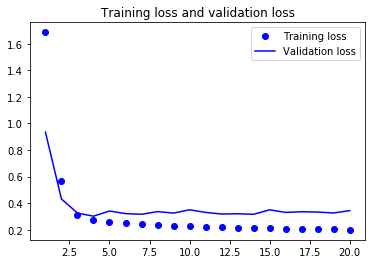

In [45]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b-', label='Validation loss')
plt.title('Training loss and validation loss')
plt.legend()

> Some of our validation losses get close to the no-learning baseline, but not very
reliably. This goes to show the merit of having had this baseline in the first place: it turns
out not to be so easy to outperform. Our common sense contains already a lot of valuable
information that a machine learning model does not have access to.

有些验证损失接近前面的常识性非学习方法的基线，但是很不稳定。这个例子同样展示了前面的基线的价值：这个常识性方法的基线并不容易突破。我们的常识已经包含了许多机器学习模型所不具备的有价值的信息。

> You may ask, if there exists a simple, well-performing model to go from the data to
the targets (our common sense baseline), why doesn’t the model we are training find it
and improve on it? Simply put: because this simple solution is not what our training setup
is looking for. The space of models in which we are searching for a solution, i.e. our
hypothesis space, is the space of all possible 2-layer networks with the configuration that
we defined. These networks are already fairly complicated. When looking for a solution
with a space of complicated models, the simple well-performing baseline might be
unlearnable, even if it’s technically part of the hypothesis space. That is a pretty
significant limitation of machine learning in general: unless the learning algorithm is
hard-coded to look for a specific kind of simple model, parameter learning can
sometimes fail to find a simple solution to a simple problem.

你可能会问，如果存在一个简单的性能良好的模型可以从数据中获得目标（就像我们常识性的基线那样），为什么我们训练的模型不能找到它然后改善它呢？简单来说就是：因为这个简单的结果并不是我们训练的目标。我们试图寻找结果的模型空间或者叫假设空间，就是我们定义的两层网络的所有可能的表现总和。这些网络虽然已经比较复杂了，但是当你训练这样的模型时，简单的基线可能无法被学习到，即使在这个极限模型在数学上确实处于假设空间中。这是机器学习的一个基本限制：除非学习算法被硬编码成专门寻找特性的简单模型，否则参数学习很可能无法找到简单问题的简单方案。

### 6.2.5 第一个RNN基线

> Our first fully-connected approach didn’t do so well, but that doesn’t mean machine
learning is not applicable to our problem. The approach above consisted in first flattening
the timeseries, which removed the notion of time from the input data. Let us instead look
at our data as what it is: a sequence, where causality and order matter. We will try a
recurrent sequence processing model—it should be the perfect fit for such sequence data,
precisely because it does exploit the temporal ordering of data points, unlike our first
approach.

我们第一个全连接方法性能很一般，但这不代表着机器学习方法不适合这个问题。上面方法的第一步将时间序列数据铺平了，这样实际上清楚了输入数据中的时间关系。下面我们要按照原始数据的特点对待它：一个序列，其中数据的因果关系和顺序是很关键的。所以下面我们尝试使用一个循环序列处理模型，它能很好的适应序列数据，因为它能够从时间顺序的数据点中提取到信息，不像前面那个模型那样。

> Instead of the LSTM layer introduced in the previous section, we will use the GRU
layer, developed by Cho et al. in 2014. GRU layers (which stands for "gated recurrent
unit") work by leveraging the same principle as LSTM, but they are somewhat
streamlined and thus cheaper to run, albeit they may not have quite as much
representational power as LSTM. This trade-off between computational expensiveness
and representational power is seen everywhere in machine learning.

这里我们不打算使用前一节介绍的LSTM层，取而代之使用GRU层，它是2014年由Cho发明的。GRU层（名字是门循环单元的缩写）使用了与LSTM一致的原理，但它们更加的精简，因此会消耗较少的计算资源，尽管它可能没有LSTM那么强大的表现能力。在机器学习任务中，这样的计算资源占用和表现能力的取舍是随处可见的。

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32, input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit(train_gen, steps_per_epoch=500,
                   epochs=20, validation_data=val_gen,
                   validation_steps=val_steps)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 500 steps, validate for 769 steps
Epoch 1/20
500/500 [==============================] - 66s 132ms/step - loss: 0.3003 - val_loss: 0.2715
Epoch 2/20
500/500 [==============================] - 63s 126ms/step - loss: 0.2843 - val_loss: 0.2651
Epoch 3/20
500/500 [==============================] - 63s 126ms/step - loss: 0.2774 - val_loss: 0.2672
Epoch 4/20
500/500 [==============================] - 63s 127ms/step - loss: 0.2737 - val_loss: 0.2628
Epoch 5/20
500/500 [==============================] - 63s 126ms/step - loss: 0.2695 - val_loss: 0.2643
Epoch 6/20
500/500 [==============================] - 63s 126ms/step - loss: 0.2651 - val_loss: 0.2637
Epoch 7/20
500/500 [==============================] - 63s 127ms/step - loss: 0.2610 - val_loss: 0.2723
Epoch 8/20
500/500 [==============================] - 63s 126ms/step - loss: 0.2551 - val_loss: 0.2686
Epoch 9/20
500/500 [==============================] - 63s 126ms/step - loss: 0.252

> Let look at our results:

看一下结果情况：

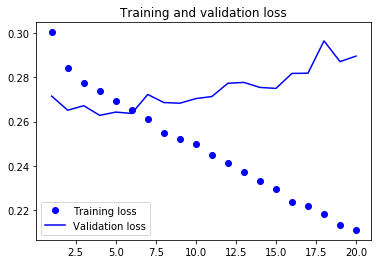

In [47]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b-', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

> Much better! We are able to significantly beat the common sense baseline, such
demonstrating the value of machine learning here, as well as the superiority of recurrent
networks compared to sequence-flattening dense networks on this type of task.

好多了！使用上面简单的序列模型就已经能够超越我们的常识基线了，这展示了机器学习的价值，同样也说明了在这种类型的任务上循环网络对比平铺全连接网络的优势所在。

> Our new validation MAE of ~0.265 (before we start significantly overfitting)
translates to a mean absolute error of 2.35°C after de-normalization. That’s a solid gain
on our initial error of 2.57°C, but we probably still have a bit of margin for improvement.

上面的验证MAE大约在0.265左右（之后就开始出现严重的过拟合了），反标准化后得到的平均绝对误差是2.35°C。这和之前常识性的误差2.57°C相比有着很大改善，不过我们还有改进的空间。

### 6.3.6 使用循环dropout来对抗过拟合

> It is evident from our training and validation curves that our model is overfitting: the
training and validation losses start diverging considerably after a few epochs. You are
already familiar with a classic technique for fighting this phenomenon: dropout,
consisting in randomly zeroing-out input units of a layer in order to break happenstance
correlations in the training data that the layer is exposed to. How to correctly apply
dropout in recurrent networks, however, is not a trivial question. It has long been known
that applying dropout before a recurrent layer hinders learning rather than helping with
regularization. In 2015, Yarin Gal, as part of his Ph.D. thesis on Bayesian deep learning,
determined the proper way to use dropout with a recurrent network: the same dropout
mask (the same pattern of dropped units) should be applied at every timestep, instead of a
dropout mask that would vary randomly from timestep to timestep. What’s more: in order
to regularize the representations formed by the recurrent gates of layers such as GRU and
LSTM, a temporally constant dropout mask should be applied to the inner recurrent
activations of the layer (a "recurrent" dropout mask). Using the same dropout mask at
every timestep allows the network to properly propagate its learning error through time; a
temporally random dropout mask would instead disrupt this error signal and be harmful
to the learning process.

从上面的曲线就可以明显看到过拟合：几个epochs之后训练和验证损失就开始偏离。你已经知道对抗这个现象的典型方法了：那就是dropout，通过随机将输入单元清零来打破模型层偶然发现的训练数据上的关联性。但是要将dropout应用到循环网络上不是一个简单的问题。很早人们就知道在循环层前面应用dropout会阻碍学习而不是增强泛化能力。在2015年，Yarin Gal在他的有关贝叶斯深度学习的博士学位论文中，发现了在循环网络中使用dropout的正确方法：也就是在每个时间步长上都应用相同的dropout遮罩（dropout单元保持一致），应该避免在每个时间步长上都应用随机的dropout单元。更确切的说就是，为了提升诸如GRU或LSTM这样的循环层的泛化表现形式，应该在内部循环层的激活上应用一个临时常量的dropout单元（或者叫做“循环”dropout遮罩）。在每个时间步长上应用相同的dropout遮罩能够让网络可以正确的传播学习的错误；而如果使用随机的dropout遮罩反而会破坏这些误差信号，从而危害学习的过程。

> Yarin Gal did his research using Keras and helped build this mechanism directly into
Keras recurrent layers. Every recurrent layer in Keras has two dropout-related arguments:
dropout , a float specifying the dropout rate for input units of the layer, and
recurrent_dropout , specifying the dropout rate of the recurrent units. Let’s add
dropout and recurrent dropout to our GRU layer and see how it impacts overfitting.
Because networks being regularized with dropout always take longer to fully converge,
we train our network for twice as many epochs.

Yarin Gal在他的研究中使用了Keras，并且协助在Keras的循环层中直接内建了这种机制。Keras中的每一个循环层都有两个与dropout相关的参数：一是dropout，用来设置层上输入单元的dropout比例，二是recurrent_dropout，用来设置循环单元本身的dropout比例。下面让我们将这两个参数加入到我们的GRU层上来观察它们如何影响过拟合的情况。因为使用dropout的网络都需要更长时间才能完全收敛，所以我们使用了两倍的epochs参数来训练我们的网络。

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32, dropout=0.2, recurrent_dropout=0.2,
                    input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit(train_gen, epochs=40,
                   steps_per_epoch=500, validation_data=val_gen,
                   validation_steps=val_steps)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 500 steps, validate for 769 steps
Epoch 1/40
500/500 [==============================] - 105s 209ms/step - loss: 0.3395 - val_loss: 0.2751
Epoch 2/40
500/500 [==============================] - 105s 209ms/step - loss: 0.3115 - val_loss: 0.2722
Epoch 3/40
500/500 [==============================] - 103s 206ms/step - loss: 0.3043 - val_loss: 0.2691
Epoch 4/40
500/500 [==============================] - 102s 205ms/step - loss: 0.3006 - val_loss: 0.2698
Epoch 5/40
500/500 [==============================] - 101s 203ms/step - loss: 0.2976 - val_loss: 0.2671
Epoch 6/40
500/500 [==============================] - 100s 200ms/step - loss: 0.2945 - val_loss: 0.2669
Epoch 7/40
500/500 [==============================] - 99s 199ms/step - loss: 0.2924 - val_loss: 0.2705
Epoch 8/40
500/500 [==============================] - 100s 201ms/step - loss: 0.2872 - val_loss: 0.2689
Epoch 9/40
500/500 [==============================] - 100s 200ms/step - los

> Let’s take a look at our results:

再来看一下结果：

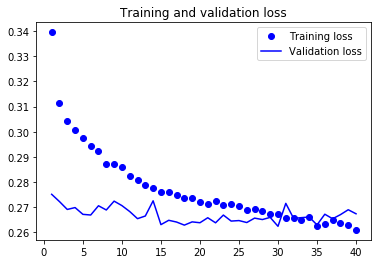

In [49]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b-', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

> Great success; we are no longer overfitting during the first 30 epochs. However,
while we have more stable evaluation scores, our best scores are not much lower than
they were previously.

很成功；前30个epochs中都没有出现过拟合的情况。然而，虽然我们获得了更加稳定的验证损失，但是最好的性能与前面的模型相比并没有改善。

### 6.3.7 堆叠循环层

> Since we are no longer overfitting yet we seem to have hit a performance bottleneck, we
should start considering increasing the capacity of our network. If you remember our
description of the "universal machine learning workflow": it is a generally a good idea to
increase the capacity of your network until overfitting becomes your primary obstacle
(assuming that you are already taking basic steps to mitigate overfitting, such as using
dropout). As long as you are not overfitting too badly, then you are likely under-capacity.

现在过拟合已经不再是问题，不过我们好像碰到了性能的瓶颈，下面应该考虑增加网络的容量。如果你还记得前面介绍过得“通用机器学习流程”：在过拟合变成主要障碍之前，增加网络容量都是一个好主意（前提是你已经采取了基本的方法来限制过拟合了，比方说使用dropout）。只要你没有出现严重的过拟合，那么通常来说就是因为网络的容量不足。

> Increasing network capacity is typically done by increasing the number of units in the
layers, or adding more layers. Recurrent layer stacking is a classic way to build more
powerful recurrent networks: for instance, what currently powers the Google translate
algorithm is a stack of seven large LSTM layers—that’s huge.

增加层内的单元数或者增加更多层都是增加网络容量的典型方法。堆叠循环层是构建更加强大循环网络的经典做法：例如目前谷歌翻译算法使用的就是7个大型LSTM层堆叠起来的网络，相当巨大。

> To stack recurrent layers on top of each other in Keras, all intermediate layers should
return their full sequence of outputs (a 3D tensor) rather than their output at the last
timestep. This is done by specifying return_sequences=True :

要在Keras中堆叠循环层，所有中间层都需要返回完整的序列输出（一个3D张量）而不仅是最后一个时间步长的输出。这可以通过设置`return_sequences=True`参数来实现：

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32, dropout=0.1,
                     recurrent_dropout=0.5, return_sequences=True,
                     input_shape=(None, float_data.shape[-1])))
model.add(layers.GRU(64, dropout=0.1,
                     recurrent_dropout=0.5, activation='relu'))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit(train_gen, steps_per_epoch=500, 
                    epochs=40, validation_data=val_gen, 
                    validation_steps=val_steps)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 500 steps, validate for 769 steps
Epoch 1/40
500/500 [==============================] - 247s 493ms/step - loss: 0.3318 - val_loss: 0.2743
Epoch 2/40
500/500 [==============================] - 262s 523ms/step - loss: 0.3126 - val_loss: 0.2727
Epoch 3/40
500/500 [==============================] - 286s 572ms/step - loss: 0.3041 - val_loss: 0.2703
Epoch 4/40
500/500 [==============================] - 364s 728ms/step - loss: 0.2974 - val_loss: 0.2800
Epoch 5/40
500/500 [==============================] - 235s 470ms/step - loss: 0.2934 - val_loss: 0.2663
Epoch 6/40
500/500 [==============================] - 234s 468ms/step - loss: 0.2869 - val_loss: 0.2660
Epoch 7/40
500/500 [==============================] - 279s 559ms/step - loss: 0.2869 - val_loss: 0.2679
Epoch 8/40
500/500 [==============================] - 238s 476ms/step - loss: 0.2831 - val_loss: 0.2696
Epoch 9/40
500/500 [==============================] - 220s 439ms/step - lo

> Let’s take a look at our results:

同样来看些结果：

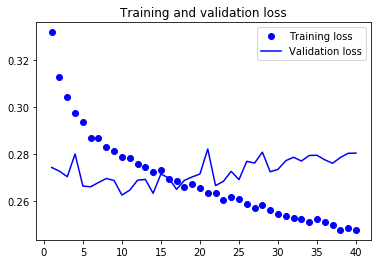

In [51]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b-', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

> We can see that the added layers does improve ours results by a bit, albeit not very
significantly. We can draw two conclusions:

> - Since we are still not overfitting too badly, we could safely increase the size of our
layers, in quest for a bit of validation loss improvement. This does have a non-negligible
computational cost, though.
- Since adding a layer did not help us by a significant factor, we may be seeing
diminishing returns to increasing network capacity at this point.

我们确实看到增加层次后确实提升了一点点的性能，尽管非常不明显。我们从中得到下面两个结论：

- 因为上图中还是没有出现严重的过拟合，因此我们还是可以大胆的增加我们层次的尺寸，来试图改善网络性能降低验证损失。但是这会带来无法忽略的计算资源消耗。
- 因为增加一个层次无法帮助我们大幅度提升性能，因此我们很可能会观察到增加网络容量会带来缩减的性能提升。

### 6.3.8 使用双向RNN

> The last technique that we will introduce in this section is called "bidirectional RNNs". A
bidirectional RNN is common RNN variant which can offer higher performance than a
regular RNN on certain tasks. It is frequently used in natural language processing—you
could call it the Swiss army knife of deep learning for NLP.

这个小节中我们将要最后介绍一种技巧，叫做“双向RNN”。双向RNN是一种常见的RNN变种，能够在某些任务上提供更高的性能。在自然语言处理领域这是经常被使用的一个方法，你也可以将它看做NLP深度学习的瑞士军刀。

> RNNs are notably order-dependent, or time-dependent: they process the timesteps of
their input sequences in order, and shuffling or reversing the timesteps can completely
change the representations that the RNN will extract from the sequence. This is precisely
the reason why they perform well on problems where order is meaningful, such as our
temperature forecasting problem. A bidirectional RNN exploits the order-sensitivity of
RNNs: it simply consists of two regular RNNs, such as the GRU or LSTM layers that
you are already familiar with, each processing input sequence in one direction
(chronologically and antichronologically), then merging their representations. By
processing a sequence both way, a bidirectional RNN is able to catch patterns that may
have been overlooked by a one-direction RNN.

RNN出名的就是顺序相关或者叫做时间相关：它们会依照顺序对输入序列数据进行处理，如果打乱或者反转这些顺序会完全改变RNN从序列中提取到的表现形式。这正是它们能够在顺序相关的任务上获得良好表现的原因，就像前面的温度预测问题。双向RNN能够更加深入挖掘RNN的这种顺序感知能力：简单来说双向RNN包含着两个普通的RNN，比方说我们已经熟悉的GRU或LSTM，这两个RNN分别使用相反的方向来处理输入序列（正向时间顺序和反向时间顺序），然后将它们的表现形式合并。通过使用不同方向处理序列，双向RNN可以捕捉到那些可能被单向RNN忽略的模式。

> Remarkably, the fact that the RNN layers in this section have so far processed
sequences in chronological order (older timesteps first) may have been an arbitrary
decision. At least, it’s a decision we made no attempt at questioning so far. Could it be
that our RNNs could have performed well enough if it were processing input sequences
in antichronological order, for instance (newer timesteps first)? Let’s try this in practice
and see what we get. All we need to do is write a variant of our data generator, where the
input sequences get reverted along the time dimension (replace the last line with yield
samples[:, ::-1, :], targets ). Training the same one-GRU-layer network as we
used in the first experiment in this section, we get the following results:

具体来说，本小节中目前为止我们都是使用正向时间顺序（首先处理旧的时间点）来处理序列数据，这可能会造成偏见式的决策。至少我们还没有尝试问下面这个问题。如果让RNN按照反向时间顺序（首先处理新的时间点）来处理输入序列数据能否获得良好的性能？下面我们就来实践一下看看结果如何。我们需要做的就是修改一下前面的数据生成器函数，将输入序列数据按照时间维度反转（只需要将最后一行修改为`[:, ::-1, :]`）。然后在前面那个单层GRU网络中重新训练数据，我们可以得到下面的结果：

In [52]:
def generator_antichrono(data, lookback, delay, min_index, max_index, 
              shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while True:
        if shuffle:
            rows = np.random.randint(min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)
        samples = np.zeros((len(rows), lookback // step, data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(row - lookback, row, step)
            samples[j] = data[indices]
            targets[j] = data[row + delay][1]
        yield samples[:, ::-1, :], targets

In [53]:
lookback = 1440
step = 6
delay = 144
batch_size = 128

train_gen = generator_antichrono(float_data, lookback=lookback,
                      delay=delay, min_index=0,
                      max_index=200000, shuffle=True,
                      step=step, batch_size=batch_size)

val_gen = generator_antichrono(float_data, lookback=lookback,
                    delay=delay, min_index=200001,
                    max_index=300000, step=step,
                    batch_size=batch_size)

test_gen = generator_antichrono(float_data, lookback=lookback,
                     delay=delay, min_index=300001,
                     max_index=None, step=step,
                     batch_size=batch_size)

# 这是从整个验证集抽取时间序列需要的步数
val_steps = (300000 - 200001 - lookback) // batch_size

# 这是从整个测试集抽取时间序列需要的步数
test_steps = (len(float_data) - 300001 - lookback) // batch_size

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32, dropout=0.2, recurrent_dropout=0.2,
                    input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit(train_gen, epochs=40,
                   steps_per_epoch=500, validation_data=val_gen,
                   validation_steps=val_steps)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 500 steps, validate for 769 steps
Epoch 1/40
500/500 [==============================] - 102s 204ms/step - loss: 0.5070 - val_loss: 0.4773
Epoch 2/40
500/500 [==============================] - 101s 202ms/step - loss: 0.4820 - val_loss: 0.4710
Epoch 3/40
500/500 [==============================] - 118s 236ms/step - loss: 0.4528 - val_loss: 0.3858
Epoch 4/40
500/500 [==============================] - 109s 217ms/step - loss: 0.3444 - val_loss: 0.2867
Epoch 5/40
500/500 [==============================] - 110s 220ms/step - loss: 0.3107 - val_loss: 0.2795
Epoch 6/40
500/500 [==============================] - 111s 222ms/step - loss: 0.3018 - val_loss: 0.2775
Epoch 7/40
500/500 [==============================] - 105s 210ms/step - loss: 0.2956 - val_loss: 0.2759
Epoch 8/40
500/500 [==============================] - 110s 219ms/step - loss: 0.2950 - val_loss: 0.2745
Epoch 9/40
500/500 [==============================] - 107s 215ms/step - lo

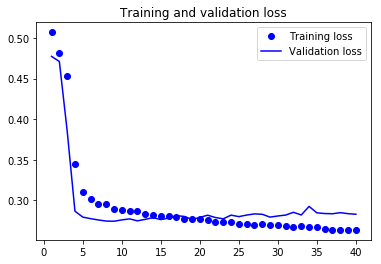

In [55]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b-', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

> So the reversed-order GRU strongly underperforms even the common-sense baseline,
indicating that the in our case chronological processing is very important to the success
of our approach. This makes perfect sense: the underlying GRU layer will typically be
better at remembering the recent past than the distant past, and naturally the more recent
weather data points are more predictive than older data points in our problem (that is
precisely what makes the common-sense baseline a fairly strong baseline). Thus the
chronological version of the layer is bound to outperform the reversed-order version.
Importantly, this is generally not true for many other problems, including natural
language: intuitively, the importance of a word in understanding a sentence is not usually
dependent on its position in the sentence. Let’s try the same trick on the LSTM IMDB
example from the previous section:

可以看到反向GRU的性能比常识性基线还要低，表明在这个任务中，正向时间顺序处理对于成功是比较关键的因素。这很正常：因为GRU层能够更好的记住不久的过去而不是更远的过去，而在这个任务当中显然更近的天气数据比更久远的数据对预测更加有帮助（这正好说明了我们提出的那个常识性基线是很强大的基线）。所以正向时间的层次能够比反向时间的层次表现更出色。但是很重要的一点是在很多其他问题当中，上面的推理是不正确的，包括自然语言处理：通过直觉可知，理解一个句子意思，单词的重要性通常完全依赖于它在句子中的位置。让我们在LSTM IMDB例子中使用相同的技巧试试看：

In [56]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# 频率最高的10000个单词作为特征
max_features = 10000
# 只使用每条影评的前500个单词
maxlen = 500
# 载入数据
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
# 反序
x_train = [x[::-1] for x in x_train]
x_test = [x[::-1] for x in x_test]
# 对齐所有序列
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

model = Sequential()
model.add(layers.Embedding(max_features, 128))
model.add(layers.LSTM(32))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 45s 2ms/sample - loss: 0.5040 - acc: 0.7576 - val_loss: 0.3433 - val_acc: 0.8636
Epoch 2/10
20000/20000 [==============================] - 42s 2ms/sample - loss: 0.3084 - acc: 0.8820 - val_loss: 0.7442 - val_acc: 0.7716
Epoch 3/10
20000/20000 [==============================] - 41s 2ms/sample - loss: 0.2611 - acc: 0.9030 - val_loss: 0.3400 - val_acc: 0.8614
Epoch 4/10
20000/20000 [==============================] - 40s 2ms/sample - loss: 0.2160 - acc: 0.9211 - val_loss: 0.4967 - val_acc: 0.8098
Epoch 5/10
20000/20000 [==============================] - 45s 2ms/sample - loss: 0.1953 - acc: 0.9305 - val_loss: 0.4155 - val_acc: 0.8574
Epoch 6/10
20000/20000 [==============================] - 41s 2ms/sample - loss: 0.1758 - acc: 0.9372 - val_loss: 0.3403 - val_acc: 0.8768
Epoch 7/10
20000/20000 [==============================] - 40s 2ms/sample - loss: 0.1572 - acc: 0.9466 - val_loss: 0.4

> We get near-identical performance as the chronological-order LSTM we tried in the
previous section.

我们获得了与上一节正向时间方式基本一致的性能。

> Thus, remarkably, on such a text dataset, reversed-order processing works just as well
as chronological processing, confirming our hypothesis that, albeit word order does
matter in understanding language, which order you use isn’t crucial. Importantly, a RNN
trained on reversed sequences will learn different representations than one trained on the
original sequences, in much the same way that you would have quite different mental
models if time flowed backwards in the real world—if you lived a life where you died on
your first day and you were born on your last day. In machine learning, representations
that are different yet useful are always worth exploiting, and the more they differ the
better: they offer a new angle from which to look at your data, capturing aspects of the
data that were missed by other approaches, and thus they can allow to boost performance
on a task. This is the intuition behind "ensembling", a concept that we will introduce in
the next chapter.

因此在这样的文本数据集上，反向处理能和正向时间处理的方式工作的一样良好，从而确认了我们前面的假设，尽管单词顺序确实对于理解语言很重要，但是使用正向还是反向的顺序并不是决定性的。更重要的是，一个使用反向序列进行训练的RNN能够学习到与原始序列不同的表现形式，正如如果我们在现实世界中沿着时间反向推进的情况下，我们的思维方式将会产生极大的区别，设想你一生中的第一天是你死去的那天，而最后一天是你出生那天。在机器学习中，不同却有用的表现形式总是值得利用的，如果这些差异越大就越好：它能提供观察数据的新视角，从而捕获到其他方式遗漏的那些模式，并因此提升你任务的性能。这是一种被称为“集成学习”的直观方法，将是下一章我们将会介绍的概念。

> A bidirectional RNN exploits this idea to improve upon the performance of
chronological-order RNNs: it looks at its inputs sequence both ways, obtaining
potentially richer representations and capturing patterns that may have been missed by
the chronological-order version alone.

双向RNN能利用这个方法来改善正向时间顺序RNN的性能：它会从两个方向处理输入序列，从而获取更加丰富的表现形式，并且可以捕获到那些正向模型遗漏的模式。

![bidirectional RNN](imgs/f6.24.jpg)

图6-24 双向RNN的工作模式

> To instantiate a bidirectional RNN in Keras, one would use the Bidirectional
layer, which takes as first argument a recurrent layer instance. Bidirectional will
create a second, separate instance of this recurrent layer, and will use one instance for
processing the input sequences in chronological order and the other instance for
processing the input sequences in reversed order. Let’s try it on the IMDB sentiment
analysis task:

要在Keras中创建一个双向RNN，需要使用Bidrectional层，它的第一个参数接收一个循环层作为输入。Bidirectional会从中创建第二个独立的循环层，这两个循环层分别处理正向序列和反向序列。下面我们在IMDB情绪分析任务来使用它试试：

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model = Sequential()
model.add(layers.Embedding(max_features, 32))
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 40s 2ms/sample - loss: 0.5428 - acc: 0.7312 - val_loss: 0.4542 - val_acc: 0.8054
Epoch 2/10
20000/20000 [==============================] - 35s 2ms/sample - loss: 0.3265 - acc: 0.8747 - val_loss: 0.3723 - val_acc: 0.8382
Epoch 3/10
20000/20000 [==============================] - 36s 2ms/sample - loss: 0.2628 - acc: 0.9025 - val_loss: 0.2906 - val_acc: 0.8868
Epoch 4/10
20000/20000 [==============================] - 37s 2ms/sample - loss: 0.2249 - acc: 0.9201 - val_loss: 0.3879 - val_acc: 0.8458
Epoch 5/10
20000/20000 [==============================] - 36s 2ms/sample - loss: 0.1996 - acc: 0.9289 - val_loss: 0.3156 - val_acc: 0.8748
Epoch 6/10
20000/20000 [==============================] - 37s 2ms/sample - loss: 0.1812 - acc: 0.9377 - val_loss: 0.3763 - val_acc: 0.8812
Epoch 7/10
20000/20000 [==============================] - 36s 2ms/sample - loss: 0.1629 - acc: 0.9427 - val_loss: 0.3

> It performs slightly better than the regular LSTM we tried in the previous section,
going above 89% validation accuracy. It also seems to overfit faster, which is
unsurprising since a bidirectional layer has twice more parameters than a chronological
LSTM. With some regularization, the bidirectional approach would likely be a strong
performer on this task.

这个模型的性能稍微比上一节中普通的LSTM模型稍好一点，能达到接近89%的验证准确率。但是它也很快就开始发生过拟合现象，考虑到它比正向LSTM模型多了一倍的参数。如果使用一些正则化方法，双向RNN很可能是这个任务的好选择。

> Now let’s try the same approach on the weather prediction task:

下面我们试试在天气预测任务上使用相同的方法：

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Bidirectional(layers.GRU(32), input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit(train_gen, steps_per_epoch=500,
                              epochs=40, validation_data=val_gen,
                              validation_steps=val_steps)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 500 steps, validate for 769 steps
Epoch 1/40
500/500 [==============================] - 74s 148ms/step - loss: 0.3000 - val_loss: 0.2716
Epoch 2/40
500/500 [==============================] - 73s 147ms/step - loss: 0.2734 - val_loss: 0.2644
Epoch 3/40
500/500 [==============================] - 73s 147ms/step - loss: 0.2671 - val_loss: 0.2660
Epoch 4/40
500/500 [==============================] - 74s 149ms/step - loss: 0.2610 - val_loss: 0.2632
Epoch 5/40
500/500 [==============================] - 75s 149ms/step - loss: 0.2565 - val_loss: 0.2678
Epoch 6/40
500/500 [==============================] - 75s 149ms/step - loss: 0.2532 - val_loss: 0.2678
Epoch 7/40
500/500 [==============================] - 75s 151ms/step - loss: 0.2471 - val_loss: 0.2667
Epoch 8/40
500/500 [==============================] - 75s 150ms/step - loss: 0.2400 - val_loss: 0.2721
Epoch 9/40
500/500 [==============================] - 75s 151ms/step - loss: 0.234

> It performs about as well as the regular GRU layer. It’s easy to understand why: all of
the predictive capacity must be coming from the chronological half of the network, since
the anti-chronological half is known to be severely underperforming on this task (again,
because the recent past matters much more than the distant past in this case).

上面的结果和普通的GRU层性能相近。很容易解释：因为所有的可预测能力基本上都来自于正向网络，因为前面我们已经知道反向网络的性能在这个任务上要差了许多（也就是说，在这个例子当中，最近的过去比久远的过去要重要很多）。

### 6.3.9 更加深入

> At this stage, there are still many other things you could try in order to improve
performance on our weather forecasting problem:

> - Adjust the number of units in each recurrent layer in the stacked setup. Our current
choices are largely arbitrary and thus likely suboptimal.
- Adjust the learning rate used by our RMSprop optimizer.
- Try using LSTM layers instead of GRU layers.
- Try using a bigger densely-connected regressor on top of the recurrent layers, i.e. a
bigger Dense layer or even a stack of Dense layers.
- Don’t forget to eventually run the best performing models (in terms of validation MAE)
on the test set! Least you start developing architectures that are overfitting to the
validation set.

到这一步，还是有很多方法你能够尝试着来改善天气预测问题的性能：

- 在堆叠网络中调整每个循环层的单元数量。前面的参数选择很随意，因此很可能不是最优的。
- 调整RMSprop优化器的学习率。
- 尝试使用LSTM层来替代GRU层。
- 在循环层上面使用一个更大的全连接回归器，也就是一个更大的全连接层或者堆叠的全连接层。
- 最后不要忘记在最佳性能模型上运行测试验证（在测试集上获得MAE值）。至少在你的网络结构在验证集上已经开始出现过拟合的情况下要去做。

> As usual: deep learning is more an art than a science, and while we can provide
guidelines as to what is likely to work or not work on a given problem, ultimately every
problem is unique and you will have to try and evaluate different strategies empirically.
There is currently no theory that will tell you in advance precisely what you should do to
optimally solve a problem. You must try and iterate.

如前所述：深度学习更像一门艺术而非一门科学，虽然我们能够在特定问题上给出相关的指导，但最终每个问题都是独一无二的，你会需要凭经验尝试和衡量各种不同的策略。目前还没有任何理论能够提前精确的指引你如何才能最优化的解决一个问题。你必须不断试验和迭代。

### 6.3.10 小结

> Here’s what you should take away from this section:

> - As you first learned in Chapter 4, when approaching a new problem, it is good to first
establish common sense baselines for your metric of choice. If you don’t have a baseline
to beat, you can’t tell if you are making any real progress.
- Try simple models before expensive ones, to justify the additional expense. Sometimes a
simple model will turn out to be your best option.
- On data where temporal ordering matters, recurrent networks are a great fit and easily
outperform models that first flatten the temporal data.
- To use dropout with recurrent networks, one should use a time-constant dropout mask
and recurrent dropout mask. This is built into Keras recurrent layers, so all you have to
do is use the dropout and recurrent_dropout arguments of recurrent layers.
- Stacked RNNs provide more representational power than a single RNN layer. They are
also much more expensive, and thus not always worth it. While they offer clear gains on
complex problems (e.g. machine translation), they might not always be relevant to
smaller, simpler problems.
- Bidirectional RNNs, which look at a sequence both ways, are very useful on natural
language processing problems. However, they will not be strong performers on sequence
data where the recent past is much more informative than the beginning of the sequence.

下面是本小节你应该掌握的知识：

- 就像第四章时介绍过的，当遇到一个新问题时，最好能够首先建立常识性的基线，作为后续方法的参照。如果你没有基线可以对比，你将难以判断是否真的有效。
- 在尝试计算昂贵的模型之前首先试验简单的模型，这样能判断付出额外的计算资源是否划算。有时可能简单的模型就是最佳选择。
- 在数据具有时间顺序的情况下，循环网络是非常合适的选择，它们能够很容易的击败那些将数据铺平的普通模型。
- 要在循环网络中应用dropout， 需要一个时间段不变的dropout遮罩和一个循环dropout遮罩。它们是内置在Keras的循环层中的，因此你仅需要在循环层中设置dropout和recurrent_dropout参数即可。
- 堆叠的RNN比单层RNN有着更大的表现形式空间，从而有着更多的表现能力。但是它们需要更加昂贵的计算资源，因此并不是在所有情况下都需要。虽然堆叠RNN在复杂问题上（例如机器翻译）获得了明显的进步，但是在小型简单问题上这并总是相关的。
- 双向RNN，可以从正向与反向同时观察数据，对于自然语言处理问题是非常有帮助的。然而，它们在那些近期过往数据比远期过往数据要重要很多的任务中并不会产生良好的效果。

> Note there are two important concepts that we will not cover in detail here: recurrent
"attention", and sequence masking. Both tend to be especially relevant for natural
language processing, and are not particularly applicable to our temperature forecasting
problem. We will leave them for future study outside of this book.

这里要说明一下，有两个重要的概念这一节当中没有详细介绍：循环“注意力”和序列遮罩。它们都与自然语言处理相关，对于我们的天气预测问题不是特别合适。这里将它们留给读者作为本书外的额外学习内容。

> One last remark to close this section—some readers are bound to want to take the
techniques we introduced here and try them on the problem of forecasting the future price
of securities on the stock market (or currency exchange rates, etc.). A warning: markets
have very different statistical characteristics from natural phenomena such as weather
patterns. Trying to use machine learning to beat markets while only having access to
publicly available data is a very difficult endeavor, and you are likely to waste your time
and resources with nothing to show for it. Always remember that when it comes to
markets, past performance is not a good predictor of future returns—looking in the
rearview mirror is a bad way to drive. Machine learning, on the other hand, is only
applicable to datasets where to past is a good predictor of the future.

最后用一个特别的提醒来结束本节，一些读者可能会希望将本节介绍的内容用于预测股价趋势（或者汇率趋势等）。作为一个警告：交易市场有着非常不同的统计学特征，和比如天气这类的自然现象差异非常大。试图仅在获取到公开可用数据的情况下使用机器学习的方法来预测市场是非常困难的，你很可能会浪费了时间和资源却一无所获。永远记住在交易市场领域中，过去的表现并不是未来回归的一个好指标，期待使用过往数据镜像成未来数据不是一个可行的做法。而机器学习只能应用在那些过去就是未来的良好预测指标的数据集之上。

## 6.4 使用卷积网络处理序列

### 6.4.1 使用1D卷积网络作为循环网络的替代来处理序列

> In chapter 5, you learned about convolutional neural networks (convnets), and how they
perform particularly well on computer vision problems, due to their ability to operate
"convolutionally", extracting features from local input patches, allowing for
representation modularity and data efficiency. The same properties that make convnets
excel at computer vision also make them highly relevant to sequence processing. Indeed,
time can be treated as a spatial dimension, like the height or the width of a 2D image.

在第五章中，我们学习了卷积神经网络，以及它们在计算机视觉问题上的优异表现，由于它们具有“卷积”操作能力，可以从一部分输入中提取特征，因此获得模块化的表现形式和数据高效性。这些使得卷积网络在计算机视觉上优异的特点同样令它们可以应用在序列处理之上。实际上，时间可以作为空间的一个维度，就像2D图像的高度和宽度一样。

> Such 1D convnets can be competitive with RNNs on certain sequence processing
problems, usually at a considerably cheaper computational cost. Recently, 1D convnets,
typically used with dilated kernels, have been with great success for audio generation and
machine translation. And besides these specific successes, it has long been known that
small 1D convnets can offer a fast alternative to RNNs for simple tasks such as text
classification or timeseries forecasting.

1D卷积网络可以在特定序列处理问题上替代RNN，并且节省下可观的计算资源。最近1D卷积网络，特别是带有扩张核的1D卷积网络，在声音生成和机器翻译领域都获得了巨大成功。除了这些特定的成功外，使用小型1D卷积网络作为RNN的快速计算替代在诸如文本分类或时间序列预测上的应用，已经广泛被认可。

### 6.4.2 理解1D卷积网络处理序列数据

> The convolution layers we introduced previously were 2D convolutions, extracting 2D
patches out of image tensors and applying a same transformation to every patch. In the
same way, we can use 1D convolutions, extracting local 1D patches (sub-sequences) out
of sequences.

之前介绍的卷积层都是2D的，用来从图像张量中提取出2D的局部模式然后对每个部分采取相同的转换操作。基于同样原理，我们可以使用1D卷积层，从序列中提取出局部1D部分序列（子序列）。

![1D convolution](imgs/f6.25.jpg)

图6-25 1D卷积层工作原理：每个输出的特征都是输入序列其中一个局部片段提取的运算结果

> Such 1D convolution layers will be able to recognize local patterns in a sequence.
Because the same input transformation is performed on every patch, a pattern learned at a
certain position in a sentence can later be recognized at a different position, making 1D
convnets translation invariants (for temporal translations). For instance, a 1D convnet
processing sequences of characters using convolution windows of size 5 should be able
to learn words or word fragments of length 5 or lower, and should be able to recognize
these words in any context in an input sequence. A character-level 1D convnet is thus
capable to learn about word morphology.

这样的1D卷积层能够识别序列数据中的局部模式。因为所有提取的局部片段都应用了相同的转换操作，因此在一个句子中某个位置学习到的模式能够后续在不同的位置上识别出来，这使得1D卷积网络具有转换不变性（对于时间转换来说）。例如，一个使用卷积窗口尺寸5的1D卷积网络能够在句子中学习到长度为5或一下的单词或单词片段，然后就可以将这些学习到的单词应用到输入序列的任何地方。所以字符级别的1D卷积网络能够学习到词法的知识。

### 6.4.3 对序列数据使用1D池化

> You are already familiar with 2D pooling operations, such as 2D average pooling or max
pooling, used in convnets to spatially downsample image tensors. The 2D pooling
operation has a 1D equivalent, extracting 1D patches (subsequences) from an input and
outputting the maximum value ("max pooling") or average value ("average pooling").
Just like in 2D convnets, his is used for reducing the length of 1D inputs
("subsampling").

你应该已经熟悉2D池化操作了，如2D平均池化或最大池化，它们用于在卷积网络中对图像张量空间进行降低取样。同样2D池化操作也有着1D的版本，用来从1D的局部特征（子序列）中提取最大值（“最大池化”）或平均值（“平均池化”）。与2D卷积网络一样，1D池化用来缩减1D输入序列的长度（“降采样”）。

### 6.4.4 实现一个1D卷积网络

> In Keras, you would use a 1D convnet via the Conv1D layer, which has a very similar
interface to Conv2D . It takes as input 3D tensors with shape (samples, time,
features) and also returns similarly-shaped 3D tensors. The convolution window is a
1D window on the temporal axis, axis 1 in the input tensor.

在Keras中你可以通过Conv1D来定义1D卷积网络，它有着与Conv2D非常相似的接口。Conv1D接收一个3D张量作为输入，形状为(样本数, 时间, 特征数)，返回一同相似形状的3D张量。其中的卷积窗口是一个1D的窗口，应用在时间轴上，也就是输入张量中的序号1的轴。

> Let’s build a simple 2-layer 1D convnet and apply it to the IMDB sentiment
classification task that you are already familiar with.

下面我们来构建一个简单的两层1D卷积网络，用它来尝试解决IMDB情绪分析任务。

> As a reminder, this is the code for obtaining and preprocessing the data:

作为一个复习，下面的代码是数据获取及预处理的过程：

In [59]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_features = 10000 # 词汇表的最大长度，特征维度
max_len = 500 # 仅取每条评论的前500个单词

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')
print('Pad sequences (samples x time)')

x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 500)
x_test shape: (25000, 500)


> 1D convnets are structured in the same way as their 2D counter-parts that you have
used in Chapter 5: they consist of a stack of Conv1D and MaxPooling1D layers,
eventually ending in either a global pooling layer or a Flatten layer, turning the 3D
outputs into 2D outputs, allowing to add one or more Dense layers to the model, for
classification or regression.

1D卷积网络的构建方式与它的2D兄弟是一样的：它们包括着堆叠的Conv1D和MaxPooling1D层，最后是一个全局池化层或者一个平铺层，将3D的张量转换成2D的张量输出，然后就可以增加一个或多个全连接层，用来进行分类或回归。

> One difference, though, is the fact that we can afford to use larger convolution
windows with 1D convnets. Indeed, with a 2D convolution layer, a 3x3 convolution
window contains 3*3 = 9 feature vectors, but with a 1D convolution layer, a convolution
window of size 3 would only contain 3 feature vectors. We can thus easily afford 1D
convolution windows of size 7 or 9.

不过有一个区别，那就是我们可以在1D卷积网络中使用一个巨大的卷积窗口。实际上在2D卷积层中，一个3x3的卷积窗口包含着`3*3 = 9`的特征向量，但是在一个1D卷积层中，一个大小为3的卷积窗口仅包含3个特征向量。我们可以很自然的使用大小为7或9的卷积窗口。

> This is our example 1D convnet for the IMDB dataset:

下面就是我们在IMDB数据集上使用1D卷积网络的例子：

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length=max_len))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

model.summary()

model.compile(optimizer=RMSprop(lr=1e-4), loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_split=0.2)

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 500, 128)          1280000   
_________________________________________________________________
conv1d (Conv1D)              (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 98, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 92, 32)            7200      
_________________________________________________________________
global_max_pooling1d (Global (None, 32)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 33        
Total params: 1,315,937
Trainable params: 1,315,937
Non-trainable params: 0
___________________________________________

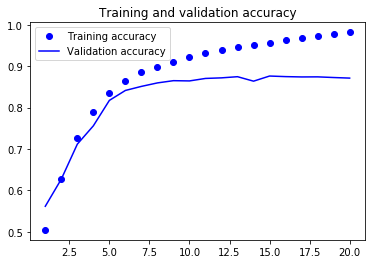

In [61]:
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b-', label='Validation accuracy')

plt.title('Training and validation accuracy')
plt.legend()

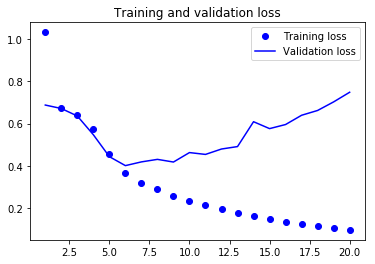

In [62]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b-', label='Validation loss')

plt.title('Training and validation loss')
plt.legend()

> Here are our training and validation results: validation accuracy is somewhat lower
than that of the LSTM we used two sections ago, but runtime is faster, both on CPU and
GPU (albeit the exact speedup will vary greatly depending on your exact configuration).
At that point, we could re-train this model for the right number of epochs (8), and run it
on the test set. This is a convincing demonstration that a 1D convnet can offer a fast,
cheap alternative to a recurrent network on a word-level sentiment classification task.

上面看到了训练和验证的结果：验证准确率比起前面的LSTM模型要低，但是运行时间更快，无论是在CPU还是GPU上（尽管节省的时间与准确的配置相关）。根据结果，我们可以使用正确的8轮epochs来重新训练我们的模型，然后将它应用到测试集上。这个实验可以证明在单词级别的情绪分类任务上，1D卷积网络能够提供一个比循环网络更加快速和便宜的替代。

### 6.4.5 结合卷积网络和循环网络应用在超长序列任务上

> Because 1D convnets process input patches independently, they are not sensitive to the
order of the timesteps (beyond a local scale, the size of the convolution windows), unlike
RNNs. Of course, in order to be able to recognize longer-term patterns, one could stack
many convolution layers and pooling layers, resulting in upper layers that would "see"
long chunks of the original inputs—but that’s still a fairly weak way to induce
order-sensitivity. One way to evidence this weakness is to try 1D convnets on the
temperature forecasting problem from the previous section, where order-sensitivity was
key to produce good predictions. Let’s see:

因为1D卷积网络是独立处理每个输入片段的，所以它无法很好的感知时间序列的顺序（只能感知局部的卷积窗口大小的顺序），这点无法和RNN相比。当然，为了能够认知长期的模式，也可以堆叠很多的卷积层和池化层，这样处于较高层次的卷积层就能“看见”原始输入中更长的片段，但是这仍然对于顺序识别任务来说还是很弱。我们可以将1D卷积网络应用到前面的气温预测问题中来证明这一点，这个问题中输入数据的顺序对于产生良好预测结果是非常关键的。我们来看看：

In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Conv1D(32, 5, activation='relu',
                        input_shape=(None, float_data.shape[-1])))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')

cnn_history = model.fit_generator(train_gen, steps_per_epoch=500,
                                  epochs=20, validation_data=val_gen,
                                  validation_steps=val_steps)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 500 steps, validate for 769 steps
Epoch 1/20
500/500 [==============================] - 21s 43ms/step - loss: 0.4175 - val_loss: 0.4342
Epoch 2/20
500/500 [==============================] - 21s 42ms/step - loss: 0.3564 - val_loss: 0.4516
Epoch 3/20
500/500 [==============================] - 21s 42ms/step - loss: 0.3316 - val_loss: 0.4334
Epoch 4/20
500/500 [==============================] - 21s 41ms/step - loss: 0.3158 - val_loss: 0.4422
Epoch 5/20
500/500 [==============================] - 21s 42ms/step - loss: 0.3015 - val_loss: 0.4399
Epoch 6/20
500/500 [==============================] - 21s 42ms/step - loss: 0.2932 - val_loss: 0.4987
Epoch 7/20
500/500 [==============================] - 21s 42ms/step - loss: 0.2837 - val_loss: 0.4503
Epoch 8/20
500/500 [==============================] - 21s 42ms/step - loss: 0.2766 - val_loss: 0.4826
Epoch 9/20
500

> Here are our training and validation Mean Absolute Errors:

下面是训练和验证的平均绝对误差：

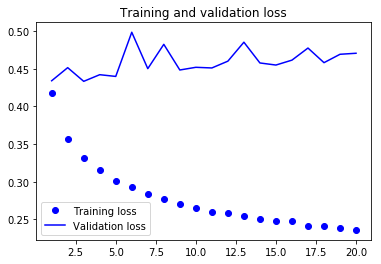

In [64]:
loss = cnn_history.history['loss']
val_loss = cnn_history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b-', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

> The validation MAE stays in the low 0.40s: we cannot even beat our common-sense
baseline using the small convnet. Again, this is because our convnet looks for patterns
anywhere in the input timeseries, and has no knowledge of the temporal position of a
pattern it sees (e.g. towards the beginning, towards the end, etc.). Since more recent
datapoints should be interpreted differently from older datapoints in the case of this
specific forecasting problem, the convnet fails at producing meaningful results here. This
limitation of convnets was not an issue on IMDB, because patterns of keywords that are
associated with a positive or a negative sentiment will be informative independently of
where they are found in the input sentences.

验证MAE保持在0.40附近：我们使用小型卷积网络甚至都无法击败常识性基线。这是因为卷积网络会在输入的时间序列局部寻找模式，但是却无法获得任何关于这个模式处于哪个时间位置的信息（比方说在开始时间或者末尾等）。因为在这个任务重，最近的数据点应该和更早期的数据点具有不同的诠释，所以卷积网络无法在这种情况下获得有意义的结果。卷积网络的这种限制不会体现在IMDB数据集上，是因为评论中的一些关键字对于正向还是负向情绪的影响与其在句子中的位置是相对无关的。

> One strategy to combine the speed and lightness of convnets with the order-sensitivity
of RNNs is to use a 1D convnet as a preprocessing step before a RNN. This is especially
beneficial when dealing with sequences that are so long that they couldn’t realistically be
processed with RNNs, e.g. sequences with thousands of steps. The convnet will turn the
long input sequence into much shorter (downsampled) sequences of higher-level features.
This sequence of extracted features then becomes the input to the RNN part of the
network.

有一种策略能够将卷积网络的轻量特点和RNN的顺序敏感特点结合起来，那就是使用1D卷积网络作为RNN的数据预处理步骤。这个方法在处理那种特别长的无法实际应用RNN的时间序列情况下特别适用，例如，处理一二具有上千步的序列。卷积网络能够通过降取样方法将很长的输入序列转换成具有更高层特征的短序列。然后将这些提取到的特征序列作为RNN部分的输入。

![convnet+rnn](imgs/f6.29.jpg)

图6-29 结合1D卷积网络和RNN来处理超长序列

> This technique is not seen very often in research papers and practical applications,
possibly because it is not very well known. It is very effective and ought to be more
common. Let’s try this out on the temperature forecasting dataset. Because this strategy
allows us to manipulate much longer sequences, we could either look at data from further
back (by increasing the lookback parameter of the data generator), or look at
high-resolution timeseries (by decreasing the step parameter of the generator). Here, we
will chose (somewhat arbitrarily) to use a step twice smaller, resulting in twice longer
timeseries, where the weather data is being sampled at a rate of one point per 30 minutes.

这个技巧在研究论文和实践应用中并不常见，可能因为它还未普及。但它是很有效的，应该为更多人知悉。下面我们将它应用到气温预测数据集上。因为这个策略允许我们操作更加长的序列，我们既可以查看更加久远的数据（通过增加数据生成器的lookback参数），也可以使用更加精细采样的时间序列（通过减小生成器的step参数）。下面我们选择（带有随意性）使用将step参数减半，这样能够获得两倍长度的时间序列，也就是气象数据会使用每30分钟采样一次的频率。

In [65]:
# 我们重用前面定义的数据生成器函数

# step原来设置成6(每小时一个数据点)。现在设置成3 (每30分钟一个数据点)。
step = 3
lookback = 720 # 保持不变
delay = 144 # 保持不变

train_gen = generator(float_data, lookback=lookback,
                      delay=delay, min_index=0,
                      max_index=200000, shuffle=True,
                      step=step)
val_gen = generator(float_data, lookback=lookback,
                    delay=delay, min_index=200001,
                    max_index=300000, step=step)
test_gen = generator(float_data, lookback=lookback,
                     delay=delay, min_index=300001,
                     max_index=None, step=step)

val_steps = (300000 - 200001 - lookback) // 128
test_steps = (len(float_data) - 300001 - lookback) // 128

> This is our model, starting with two Conv1D layers and following-up with a GRU layer:

下面是我们的模型，首先是两个Conv1D层，然后是一个GRU层：

In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Conv1D(32, 5, activation='relu', input_shape=(None, float_data.shape[-1])))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.GRU(32, dropout=.1, recurrent_dropout=.5))
model.add(layers.Dense(1))
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, None, 32)          2272      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, None, 32)          0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, None, 32)          5152      
_________________________________________________________________
gru_6 (GRU)                  (None, 32)                6336      
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 33        
Total params: 13,793
Trainable params: 13,793
Non-trainable params: 0
_________________________________________________________________


In [67]:
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit(train_gen, steps_per_epoch=500, 
                    epochs=20, validation_data=val_gen, 
                    validation_steps=val_steps)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 500 steps, validate for 775 steps
Epoch 1/20
500/500 [==============================] - 53s 107ms/step - loss: 0.3368 - val_loss: 0.2917
Epoch 2/20
500/500 [==============================] - 51s 103ms/step - loss: 0.3031 - val_loss: 0.2774
Epoch 3/20
500/500 [==============================] - 56s 112ms/step - loss: 0.2928 - val_loss: 0.2780
Epoch 4/20
500/500 [==============================] - 58s 116ms/step - loss: 0.2843 - val_loss: 0.2899
Epoch 5/20
500/500 [==============================] - 57s 113ms/step - loss: 0.2781 - val_loss: 0.2813
Epoch 6/20
500/500 [==============================] - 53s 107ms/step - loss: 0.2725 - val_loss: 0.2825
Epoch 7/20
500/500 [==============================] - 50s 101ms/step - loss: 0.2684 - val_loss: 0.2897
Epoch 8/20
500/500 [==============================] - 50s 101ms/step - loss: 0.2629 - val_loss: 0.2791
Epoch 9/20
500/500 [==============================] - 50s 100ms/step - loss: 0.258

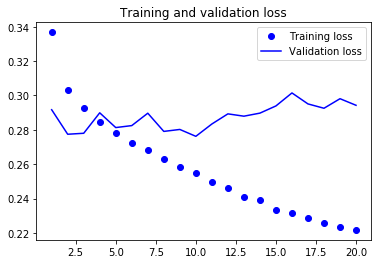

In [68]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, 21)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b-', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

> Judging from the validation loss, this setup is not quite as good as the regularized
GRU alone, but it’s significantly faster. It is looking at twice more data, which in this
case doesn’t appear to be hugely helpful, but may be important for other datasets.

从验证损失来看，这个模型的表现并不如前面的常规GRU模型，但它明显要快得多。上面的模型使用了两倍的数据，虽然在这个问题中并没有表现出巨大的优势，但是在其他数据集中可能是关键因素。

### 6.4.6 小结

> Here’s what you should take away from this section:

> - In the same way that 2D convnets perform well for processing visual patterns in 2D
space, 1D convnets perform well for processing temporal patterns. They offer a faster
alternative to RNNs on some problems, in particular NLP tasks.
- Typically 1D convnets are structured much like their 2D equivalents from the world of
computer vision: they consist of stacks of Conv1D layers and MaxPooling1D layers,
eventually ending in a global pooling operation or flattening operation.
- Because RNNs are extremely expensive for processing very long sequences, but 1D
convnets are cheap, it can be a good idea to use a 1D convnet as a preprocessing step
before a RNN, shortening the sequence and extracting useful representations for the RNN
to process.

下面是本小节应该掌握的知识点：

- 正如同使用2D卷积网络能够在2D空间中有效地提取视觉模式那样，1D卷积网络也能够很好的提取时序模式。它们能够在一些问题上作为RNN的快速替代模型存在，特别是在NLP任务当中。
- 典型1D卷积网络的结构很想它们在计算机视觉领域的2D卷积网络亲戚：它们包括着一系列堆叠而成的Conv1D层和MaxPooling1D层，最后以一个全局池化层或者平铺层结束。
- 因为RNN在处理很长的序列时是非常昂贵的，而1D卷积网络却比较便宜，因此使用1D卷积网络来作为预处理的步骤，然后将提取到的有用模式输出到RNN层来进行处理，从而缩短整体训练时间，这个方法是很有用的。

> One useful and important concept that we will not cover in these pages is that of 1D
convolution with dilated kernels.

本小节还有一个有用而重要的概念我们没有覆盖到，就是使用带扩张核的1D卷积网络。

## 6.5 总结：文本和序列的深度学习

> Here’s what you have learned in this chapter:

> - How to tokenize text.
- What word embeddings are, and how to use them.
- What recurrent networks are, and how to use them.
- How to stack RNN layers and use bidirectional RNNs to build more powerful sequence
- processing models.
- How to use 1D convnets for sequence processing.
- How to combine 1D convnets and RNNs to process long sequences.

在本章中我们学习了：

- 如何标记化文本。
- 什么是词嵌入，以及如何使用它们。
- 什么是循环网络，以及如何使用它们。
- 如何堆叠RNN层以及使用双向RNN来构建更强大的序列
- 处理模型。
- 如何使用1D卷积网络来处理序列。
- 如何结合1D卷积网络和RNN来处理长序列。

> These techniques are widely applicable to any dataset of sequence data, from text to
timeseries.

> For instance, you could use RNNs for:

> - Timeseries regression ("predicting the future").
- Timeseries classification.
- Anomaly detection in timeseries.
- Sequence labeling, e.g. identifying names or dates in sentences.
- ...

上面这些技巧被广泛应用在所有的序列数据集上，从文本到时序数据。

例如，你可以在下面场景中使用RNN：

- 时序回归（“预测未来”）。
- 时序分类。
- 时序异常检测。
- 序列标记，如在句子中识别名字和日期。
- ......

> Similarly, you could use 1D convnets for:

> - Machine translation (sequence-to-sequence convolutional models, like SliceNet).
- Document classification.
- Spelling correction.
- ...

类似的，你可以用1D卷积网络来处理：

- 机器翻译（句子到句子卷积模型，如SliceNet）。
- 文档分类。
- 拼写纠正。
- ......

> Remember: if global order matters in your sequence data, then it is preferable to use
a recurrent network to process it. This is typically the case for timeseries, where the
recent past is likely to be more informative than the distant past. But if global ordering
isn’t fundamentally meaningful, then 1D convnets will turn out to work at least as well,
while being cheaper. This is often the case for text data, where a keyword found at the
beginning of a sentence is just as meaningful as a keyword found at the end.

记住：如果全局顺序在你的序列数据中很重要，那么使用循环网络来处理这些数据就是很合适的。典型的场景就是在时间序列中最近的过去要比遥远的过去更加具有信息量。但如果全局顺序并不是特别有意义，那么1D卷积网络也能工作的很好，至少能够与循环网络一样号，但是便宜很多。这通常出现在文本数据的情况下，因为一个关键字出现在句首和出现在句尾都具有相同的重要性。

<< [第五章：计算机视觉的深度学习](Chapter5_Deep_learning_for_computer_vision.ipynb)|| [目录](index.md) || [第七章：高级深度学习最佳实践](Chapter7_Advanced_deep_learning_best_pratices.ipynb) >>